# Description
## Background and Context

AllLife Bank has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

You as a Data scientist at AllLife bank has to build a model that will help marketing department to identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

## Objective

- To predict whether a liability customer will buy a personal loan or not.

- Which variables are most significant.

- Which segment of customers should be targeted more.

 

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign? (1 => Yes, 0 => No)
* Securities_Account: Does the customer have securities account with the bank? (1 => Yes, 0 => No)
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? (1 => Yes, 0 => No)
* Online: Do customers use internet banking facilities? (1 => Yes, 0 => No)
* CreditCard: Does the customer use a credit card issued by Bank? (1 => Yes, 0 => No)



pip install imblearn
pip install pyzipcode

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV



# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

### Read the dataset

In [2]:
data= pd.read_csv('/Users/srujana/Downloads/Loan_Modelling.csv')

In [3]:
# copying data to another varaible to avoid any changes to original data
loan=data.copy()

### View the first and last 5 rows of the dataset.

In [4]:
loan.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
loan.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Understand the shape of the dataset.

In [6]:
loan.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns of data

In [7]:
print(f'Dataset has {loan.shape[0]} rows and {loan.shape[1]} columns.')  # f-string

Dataset has 5000 rows and 14 columns.


### Check the data types of the columns for the dataset.

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Verify the duplicate records

In [9]:
sum(loan.duplicated())

0

## Fixing the data types

In [10]:
loan["ZIPCode"] = loan["ZIPCode"].astype("category")
loan["Family"] = loan["Family"].astype("category")
loan["Education"] = loan["Education"].astype("category")
loan["Personal_Loan"] = loan["Personal_Loan"].astype("category")
loan["Securities_Account"] = loan["Securities_Account"].astype("category")
loan["CD_Account"] = loan["CD_Account"].astype("category")
loan["Online"] = loan["Online"].astype("category")
loan["CreditCard"] = loan["CreditCard"].astype("category")

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 302.9 KB


`we can see that the memory usage has decreased from 547.0KB to 342.5KB`

### Observations -

- Personal_Loan is the dependent variable.
- Personal_Loan is a class variable and is converted to a categorical variable for further analysis.
- All the independent variables are of type int64,float64 or categorical.

### Summary of the dataset.

In [12]:
loan.describe(include="all")

ID          Age   Experience       Income  ZIPCode  Family  \
count   5000.000000  5000.000000  5000.000000  5000.000000   5000.0  5000.0   
unique          NaN          NaN          NaN          NaN    467.0     4.0   
top             NaN          NaN          NaN          NaN  94720.0     1.0   
freq            NaN          NaN          NaN          NaN    169.0  1472.0   
mean    2500.500000    45.338400    20.104600    73.774200      NaN     NaN   
std     1443.520003    11.463166    11.467954    46.033729      NaN     NaN   
min        1.000000    23.000000    -3.000000     8.000000      NaN     NaN   
25%     1250.750000    35.000000    10.000000    39.000000      NaN     NaN   
50%     2500.500000    45.000000    20.000000    64.000000      NaN     NaN   
75%     3750.250000    55.000000    30.000000    98.000000      NaN     NaN   
max     5000.000000    67.000000    43.000000   224.000000      NaN     NaN   

              CCAvg  Education     Mortgage  Personal_Loan  \
count   5000.000000     5000.0  5000.000000         5000.0   
unique          NaN        3.0          NaN            2.0   
top             NaN        1.0          NaN            0.0   
freq            NaN     2096.0          NaN         4520.0   
mean       1.937938        NaN    56.498800            NaN   
std        1.747659        NaN   101.713802            NaN   
min        0.000000        NaN     0.000000            NaN   
25%        0.700000        NaN     0.000000            NaN   
50%        1.500000        NaN     0.000000            NaN   
75%        2.500000        NaN   101.000000            NaN   
max       10.000000        NaN   635.000000            NaN   

        Securities_Account  CD_Account  Online  CreditCard  
count               5000.0      5000.0  5000.0      5000.0  
unique                 2.0         2.0     2.0         2.0  
top                    0.0         0.0     1.0         0.0  
freq                4478.0      4698.0  2984.0      3530.0  
mean                   NaN         NaN     NaN         NaN  
std                    NaN         NaN     NaN         NaN  
min                    NaN         NaN     NaN         NaN  
25%                    NaN         NaN     NaN         NaN  
50%                    NaN         NaN     NaN         NaN  
75%                    NaN         NaN     NaN         NaN  
max                    NaN         NaN     NaN         NaN

### Observations:
- The average age of people in our dataset is 45.33 years. The minimum age of person in the dataset is 23 years and the maximum age is 67 years. The Mean and Median values are very close and it appears that age variable is  normally distributed.
- The experience variable has a minimum value of -3 years. The experience cannot be negative. So, it needs to be looked into. The mean and median are around 20years.
- The income variable is right skewed. Most of the customers(75%) have income below 100k dollars and the rest (25%) have income  greater than 100k dollars, with the highest being 224k dollars. 
- There are 467 unique zip codes with the most of the customers from 94720 zipcode.
- There are 4 unique family sizes and most of the customers are singles in the dataset.
- There are more undergrad people in the dataset.
- Average mortgage is 56.49 with standard deviation of 101.7. This indicates that there very high varaibility in mortgage. 
- 90% of the customers didnt accept personal loan.
- Most of the customers donot have securities account with the bank.
- Most of the customers donot have certificate of deposit (CD) account with the bank
- Almost 60% of the customers use internet banking.
- Almost 85% of the the customers donot use credit card issued by the bank.

In [13]:
from pandas_profiling import ProfileReport

profile = ProfileReport(loan)
# to view report created by pandas profile
profile

In [14]:
# checking for unique values in ID column
loan["ID"].nunique()

5000

* Since all the values in ID column are unique we can drop it

In [15]:
loan.drop(["ID"],axis=1,inplace=True)

In [16]:
loan["Experience"].sort_values(ascending=False).unique()

array([43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27,
       26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,
        9,  8,  7,  6,  5,  4,  3,  2,  1,  0, -1, -2, -3])

In [17]:
loan[loan["Experience"]<0].head()

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
89    25          -1     113   94303      4   2.30         3         0   
226   24          -1      39   94085      2   1.70         2         0   
315   24          -2      51   90630      3   0.30         3         0   
451   28          -2      48   94132      2   1.75         3        89   
524   24          -1      75   93014      4   0.20         1         0   

    Personal_Loan Securities_Account CD_Account Online CreditCard  
89              0                  0          0      0          1  
226             0                  0          0      0          0  
315             0                  0          0      1          0  
451             0                  0          0      1          0  
524             0                  0          0      1          0

In [18]:
loan["Experience"].replace({-1:0,-2:1,-3:0},inplace=True)

In [19]:
loan[loan["Experience"]<0].head()

Empty DataFrame
Columns: [Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []

In [20]:
loan["Family"].unique()

[4, 3, 1, 2]
Categories (4, int64): [4, 3, 1, 2]

In [21]:
loan["Education"].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [22]:
loan["Personal_Loan"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [23]:
loan["Securities_Account"].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [24]:
loan["CD_Account"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [25]:
loan["Online"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [26]:
loan["CreditCard"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [27]:
loan['Personal_Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

The 90:10% ratios in the dependent variable indicate that the dataset is imbalanced.

### Check for missing values

In [28]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing vaues in out dataset

# Exploratory Data Analysis

### Univariate analysis

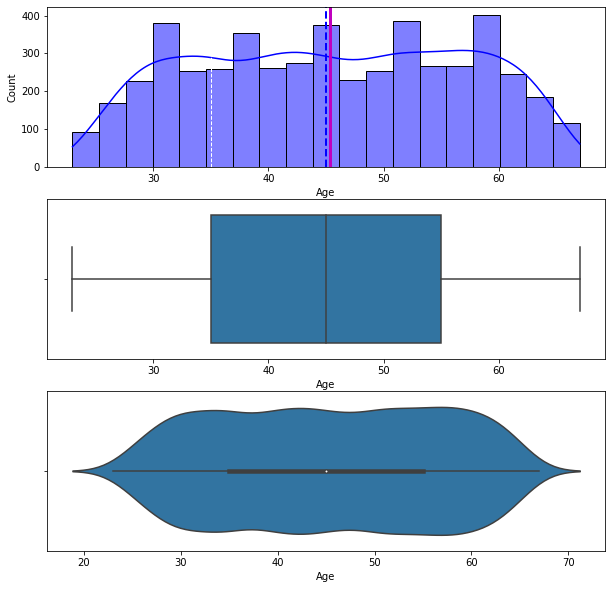

In [29]:
#View the distribution of the Age variable
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.histplot(x=loan.Age,color="blue",kde=True);
plt.axvline(loan["Age"].mean(),color='m',linewidth=3)# draw a line indicating mean
plt.axvline(loan["Age"].median(),color='b',linestyle='dashed',linewidth=2)# draw a line indicating median
plt.axvline(loan["Age"].mode()[0],color='w',linestyle='dashed',linewidth=1)# draw a line indicating mode
plt.subplot(3,1,2)
sns.boxplot(x=loan.Age);
plt.subplot(3,1,3)
sns.violinplot(x=loan.Age);

Observations:
- The customers age is ranging from 23 to 67 years.
- The average of the customers age is 45.3 yeras and median value is 45 years.

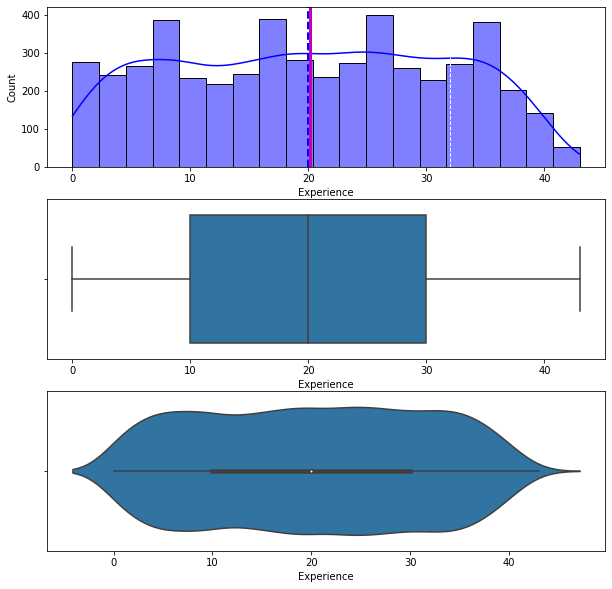

In [30]:
#View the distribution of the Experience variable
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.histplot(x=loan.Experience,color="blue",kde=True);
plt.axvline(loan["Experience"].mean(),color='m',linewidth=3)# draw a line indicating mean
plt.axvline(loan["Experience"].median(),color='b',linestyle='dashed',linewidth=2)# draw a line indicating median
plt.axvline(loan["Experience"].mode()[0],color='w',linestyle='dashed',linewidth=1)# draw a line indicating mode
plt.subplot(3,1,2)
sns.boxplot(x=loan.Experience);
plt.subplot(3,1,3)
sns.violinplot(x=loan.Experience);

Observations:
- The customers age is ranging from -3 to 43 years.
- The customers have an average of 20.1226 years experience while median is 20years.

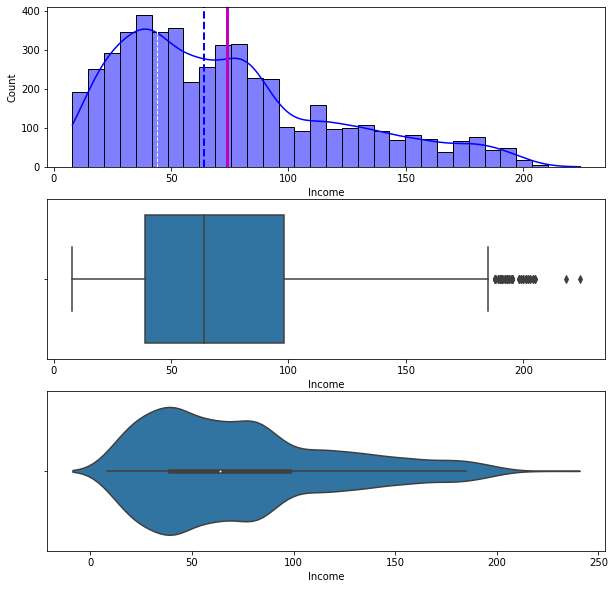

In [31]:
#View the distribution of the Income variable
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.histplot(x=loan.Income,color="blue",kde=True);
plt.axvline(loan["Income"].mean(),color='m',linewidth=3)# draw a line indicating mean
plt.axvline(loan["Income"].median(),color='b',linestyle='dashed',linewidth=2)# draw a line indicating median
plt.axvline(loan["Income"].mode()[0],color='w',linestyle='dashed',linewidth=1)# draw a line indicating mode
plt.subplot(3,1,2)
sns.boxplot(x=loan.Income);
plt.subplot(3,1,3)
sns.violinplot(x=loan.Income);

Observations:
- Income variable is highly right skewed.
- Customers income ranges from 8k to 224k.
- There are some outliers too on the right indicating that there are some customers with very high income.

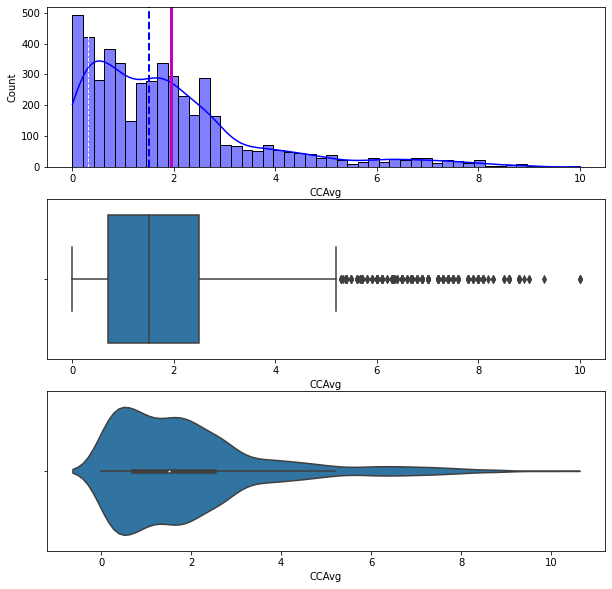

In [32]:
#View the distribution of the CCAvg variable
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.histplot(x=loan.CCAvg,color="blue",kde=True);
plt.axvline(loan["CCAvg"].mean(),color='m',linewidth=3)# draw a line indicating mean
plt.axvline(loan["CCAvg"].median(),color='b',linestyle='dashed',linewidth=2)# draw a line indicating median
plt.axvline(loan["CCAvg"].mode()[0],color='w',linestyle='dashed',linewidth=1)# draw a line indicating mode
plt.subplot(3,1,2)
sns.boxplot(x=loan.CCAvg);
plt.subplot(3,1,3)
sns.violinplot(x=loan.CCAvg);

Observation:
- CCAvg variable ranges from 0 to 10k and is highly right skewed.
- There are some outliers to the right.
- The customers average spending on credit card is 1.9k per month while the median value is 1.5k.

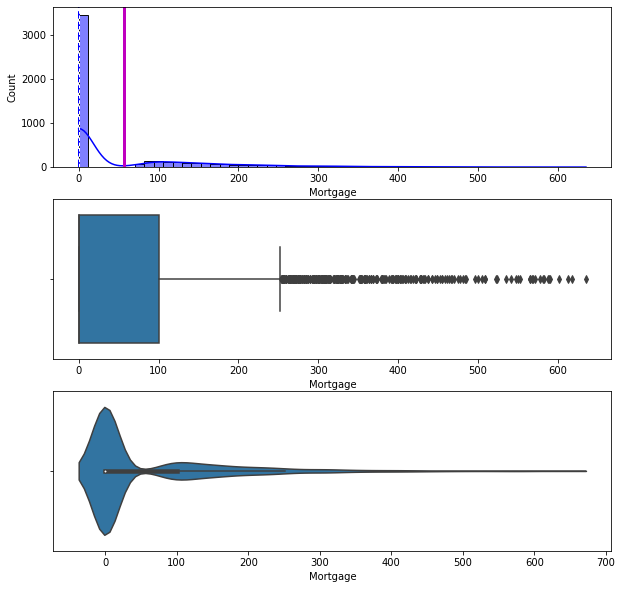

In [33]:
#View the distribution of the Mortgage variable
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.histplot(x=loan.Mortgage,color="blue",kde=True);
plt.axvline(loan["Mortgage"].mean(),color='m',linewidth=3)# draw a line indicating mean
plt.axvline(loan["Mortgage"].median(),color='b',linestyle='dashed',linewidth=2)# draw a line indicating median
plt.axvline(loan["Mortgage"].mode()[0],color='w',linestyle='dashed',linewidth=1)# draw a line indicating mode
plt.subplot(3,1,2)
sns.boxplot(x=loan.Mortgage);
plt.subplot(3,1,3)
sns.violinplot(x=loan.Mortgage);

In [34]:
# Lets look at quantiles of Mortgage
loan.Mortgage.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99,1])

0.10      0.00
0.20      0.00
0.30      0.00
0.40      0.00
0.50      0.00
0.60      0.00
0.70     78.00
0.80    123.00
0.90    200.00
0.95    272.00
0.99    431.01
1.00    635.00
Name: Mortgage, dtype: float64

Observations:
- The Mortagage variable is highly right skewed.
- 60% of the customers do not have any mortgages.

### View the plots for categorical variables

In [35]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on Family

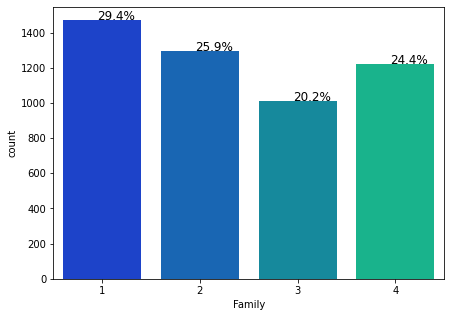

In [36]:
#View the countplot on Family size
plt.figure(figsize=(7,5))
ax = sns.countplot(x=loan["Family"],palette='winter');
perc_on_bar(ax,loan["Family"])

Observations:
- Majority of the customers in the given dataset are singles, followed by a family size of 2 people, 4 people and then 3 people.

### Observations on Education

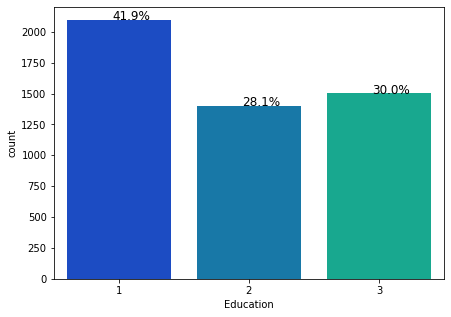

In [37]:
#View the countplot on Education Level. (1: Undergrad; 2: Graduate;3: Advanced/Professional)
plt.figure(figsize=(7,5))
ax = sns.countplot(x=loan["Education"],palette='winter');
perc_on_bar(ax,loan["Education"])

Observations:
- Majority of the cutomers are undergrads.Around 30% of the customers in the given dataset are Advanced/Professionals and 28.1%  of the customers are graduates.

### Observations on Personal Loan

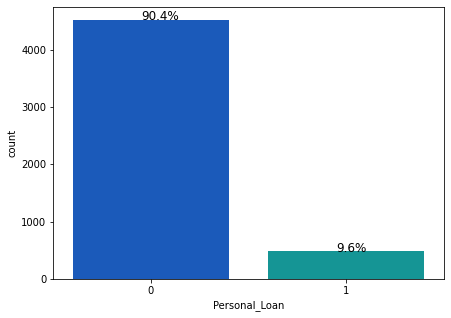

In [38]:
#View the countplot on Personal_Loan (1 => Yes, 0 => No)
plt.figure(figsize=(7,5))
ax = sns.countplot(x=loan["Personal_Loan"],palette='winter');
perc_on_bar(ax,loan["Personal_Loan"])

Observations:
- Around 10% of the customers (9.6%) have accepted Personal loan in the previous campaign.

### Observations on Securities_Account

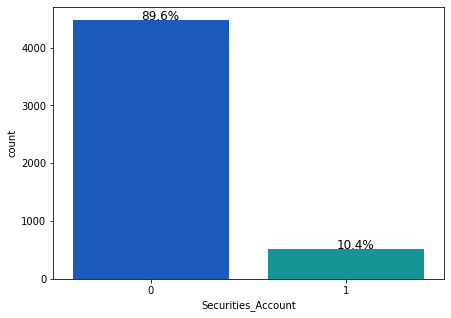

In [39]:
#View the countplot on Securities_Account (1 => Yes, 0 => No)
plt.figure(figsize=(7,5))
ax = sns.countplot(x=loan["Securities_Account"],palette='winter');
perc_on_bar(ax,loan["Securities_Account"])

Observations:
- Only 10.4% of the customers have securities account with the bank.

### Observations on CD_Account

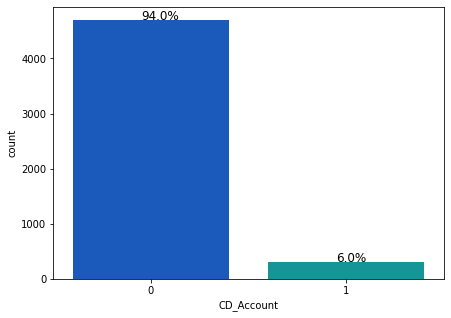

In [40]:
#View the countplot on CD_Account (1 => Yes, 0 => No)
plt.figure(figsize=(7,5))
ax = sns.countplot(x=loan["CD_Account"],palette='winter');
perc_on_bar(ax,loan["CD_Account"])

Observations:
- Only 6.0% of the customers have CD account with the bank.

### Observations on Online internet banking Usage

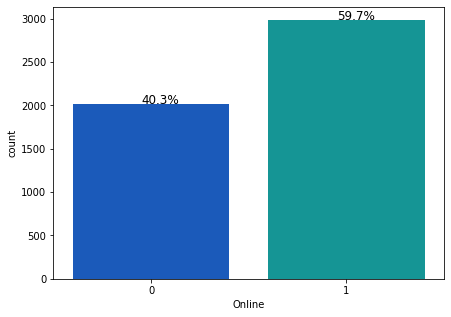

In [41]:
#View the countplot on Online (1 => Yes, 0 => No)
plt.figure(figsize=(7,5))
ax = sns.countplot(x=loan["Online"],palette='winter');
perc_on_bar(ax,loan["Online"])

Observations:
- Majority of the customers are using online banking.

### Observations on CreditCard

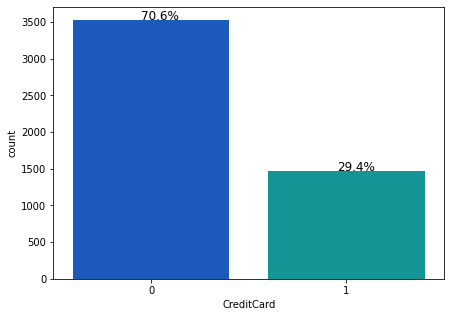

In [42]:
#View the countplot on CreditCard (1 => Yes, 0 => No)
plt.figure(figsize=(7,5))
ax = sns.countplot(x=loan["CreditCard"],palette='winter');
perc_on_bar(ax,loan["CreditCard"])

Observations:
- Majority of the customers do not use creditcard.  

## Bivariate analysis

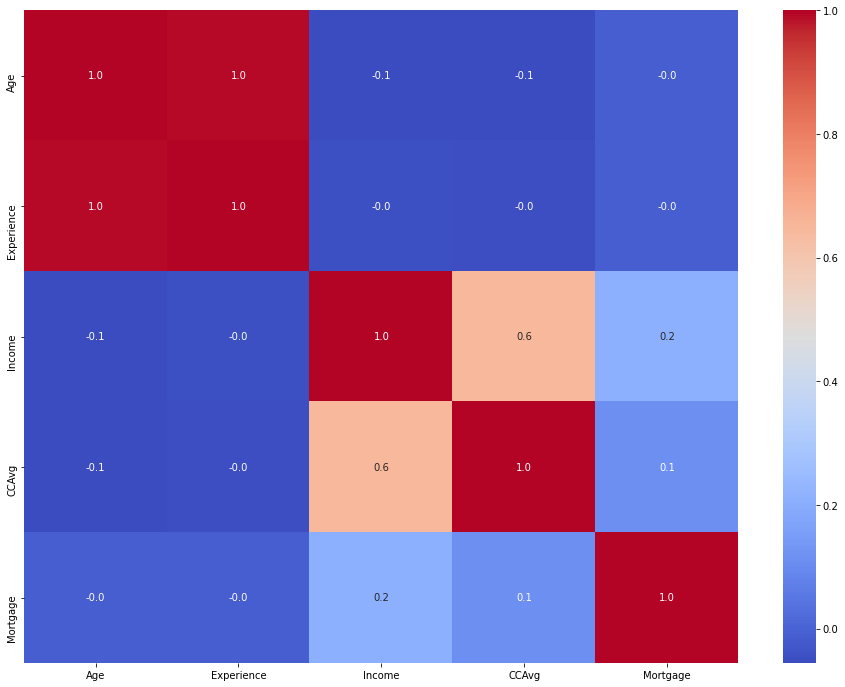

In [43]:
corr=loan.corr()   
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

Observations:
- Age and Experience are highly correlated with each other.
- Income amnd CCAvg are strongly correlated.

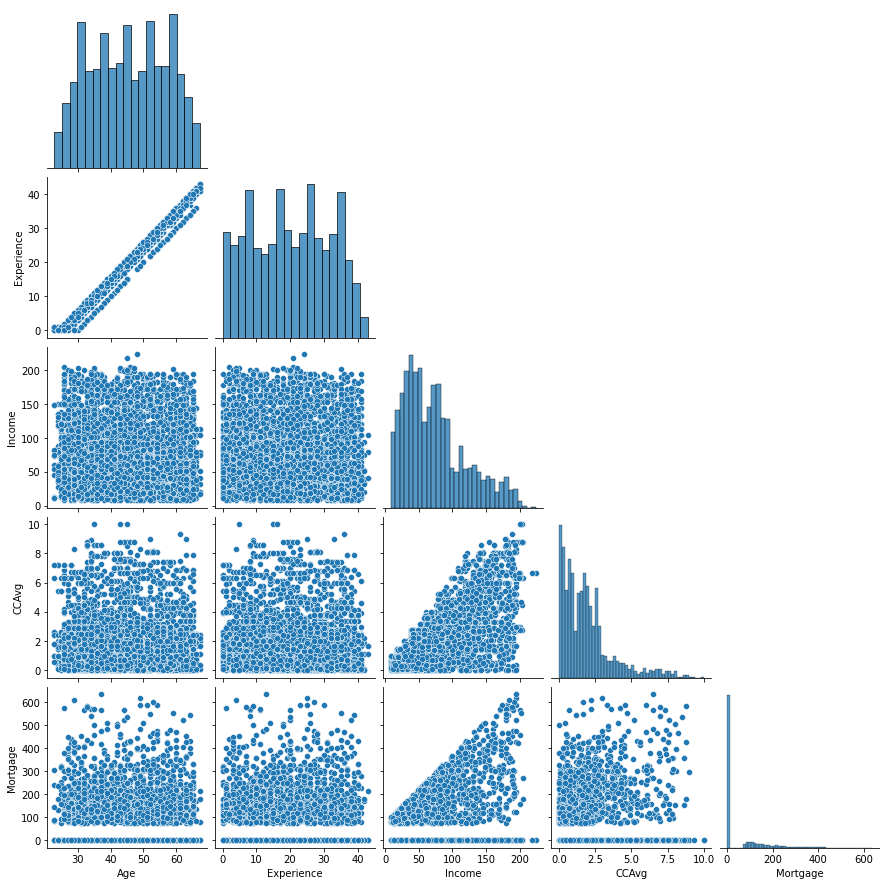

In [44]:
sns.pairplot(loan[['Age', 'Experience', 'Income', 'CCAvg',
        'Mortgage']], corner=True);

we notice similar observations from heatmap.

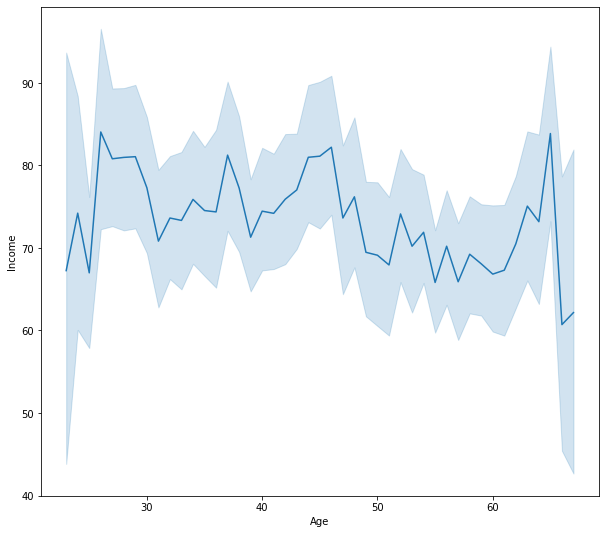

In [45]:
plt.figure(figsize=(10,9))
sns.lineplot(y="Income", x="Age", data=loan);

Observations:
- We dont see any pattern between Age and Income.   

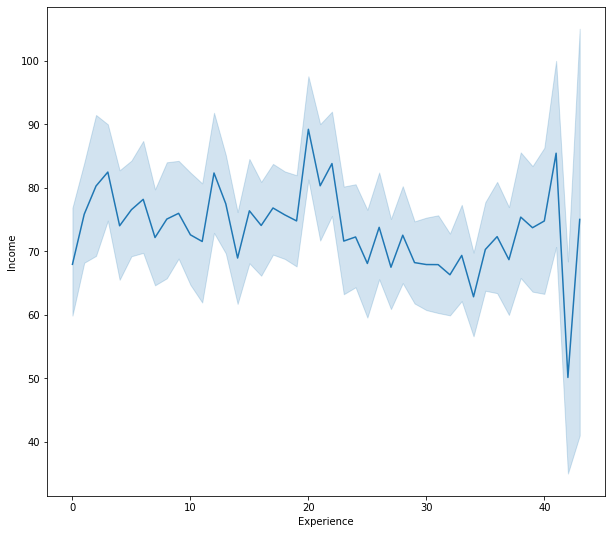

In [46]:
plt.figure(figsize=(10,9))
sns.lineplot(y="Income", x="Experience", data=loan);

Observations:
- Against to our general intution that income increases with experience, the dataset doesnt show any such pattern here.   

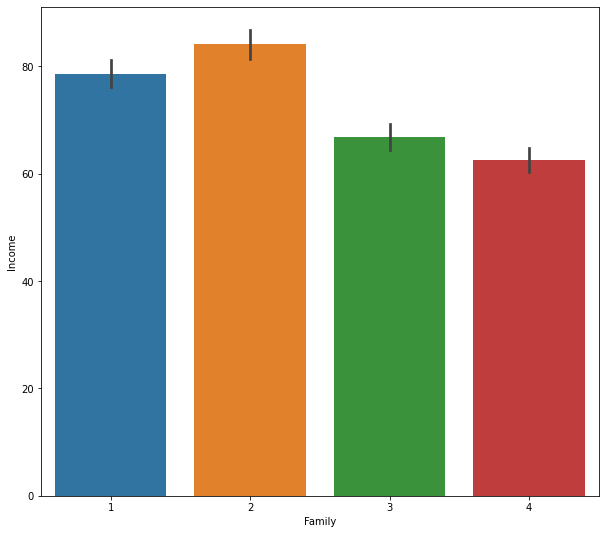

In [47]:
plt.figure(figsize=(10,9))
sns.barplot(x="Family", y="Income", data=loan);

Observations:
- The average income of customers with family size 2 is higher than the single customers and customers with family size of 3&4.

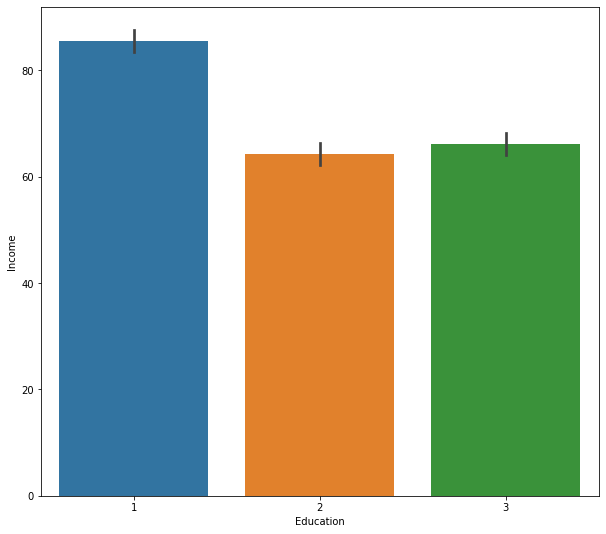

In [48]:
plt.figure(figsize=(10,9))
sns.barplot(x="Education", y="Income", data=loan);

Observations:
- The average income of undergrads is higher than graduates and Professionals.
- This disturbance could be due to higher number of undergraduates.

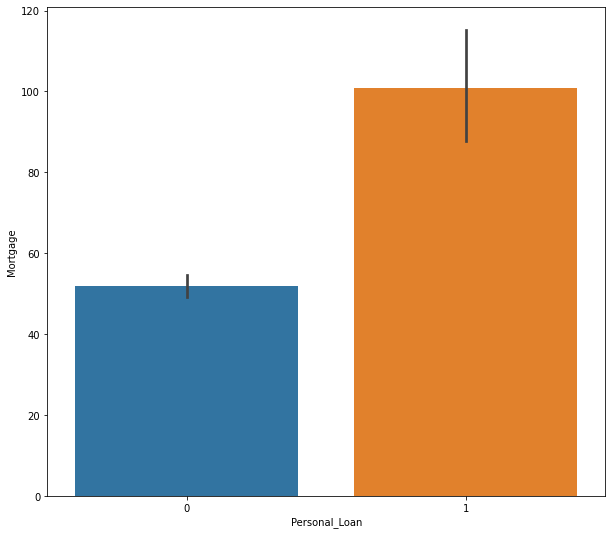

In [49]:
plt.figure(figsize=(10,9))
sns.barplot(x="Personal_Loan", y="Mortgage", data=loan);

Observations:
- The customers who have Personal Loan have higher mortgages.

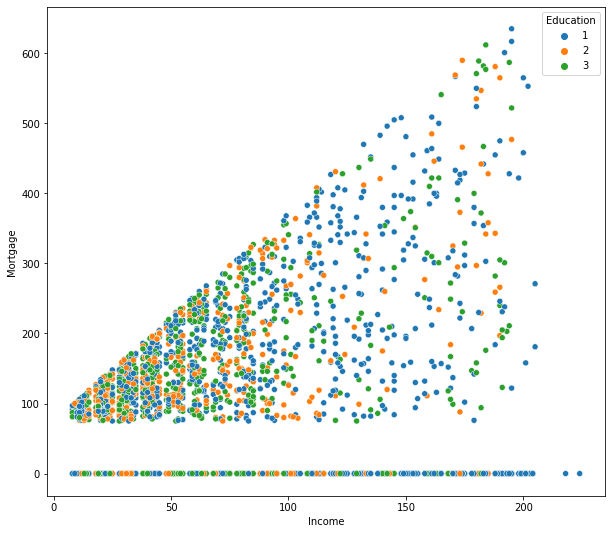

In [50]:
plt.figure(figsize=(10,9))
sns.scatterplot(y="Mortgage", x="Income", hue="Education",data=loan);

Observations:
- We observe slight positive correlation between Income and Mortgage and there outliers at 0 which shows that there are customers at all income groups with no mortgages.

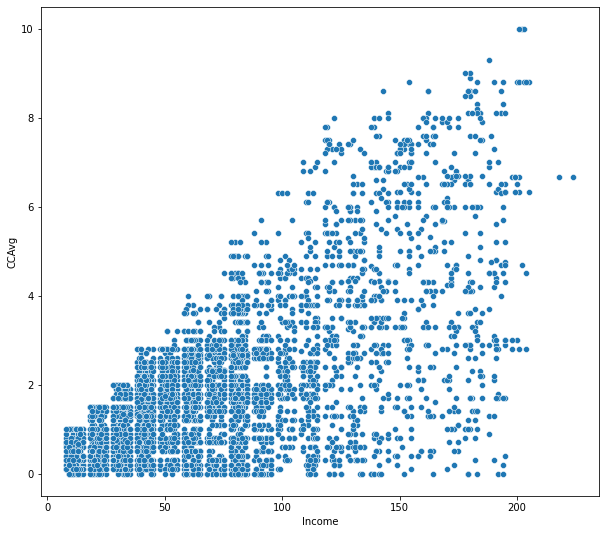

In [51]:
plt.figure(figsize=(10,9))
sns.scatterplot(y="CCAvg", x="Income", data=loan);

Observations:
- As we notice, CCAvg(average credit card bill per month) is increasing with income indicating positive correlation between the variables.

In [52]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,loan['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,loan['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


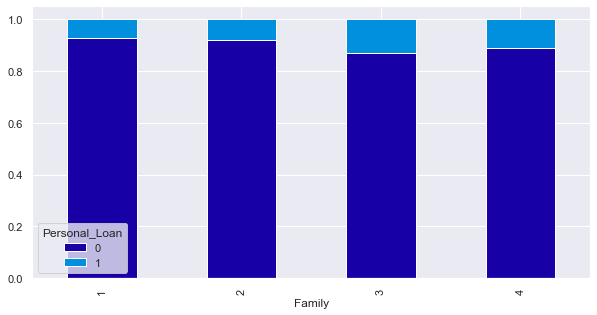

In [53]:
stacked_plot(loan['Family'])

Customers of family size 3 and then 4 have more chances of taking the personal Loan compared to others.

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


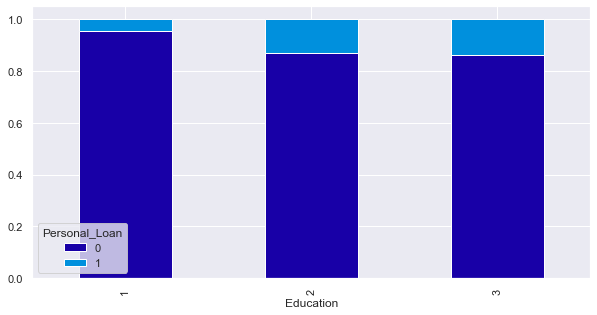

In [54]:
stacked_plot(loan['Education'])

Customers with Professional experience have more chances of taking Personal Loan compared to others.

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


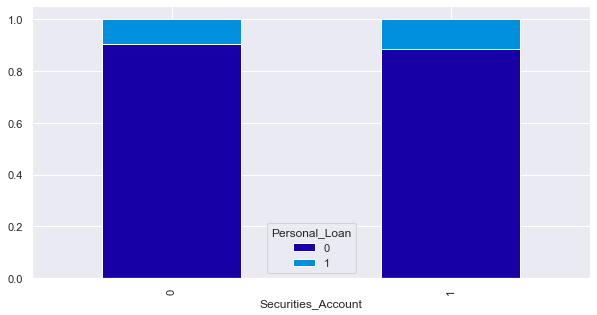

In [55]:
stacked_plot(loan['Securities_Account'])

Observations:
- There is slightly more chance for customers with Securities account to taken Personal Loan.    

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


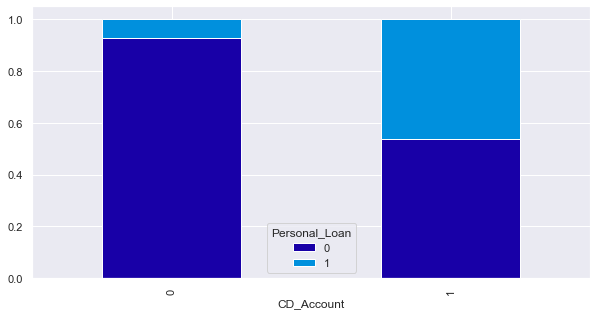

In [56]:
stacked_plot(loan['CD_Account'])

Observations:
- There are more chances for customers with CD account to taken Personal Loan compared to customers who do not have CD account. 

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


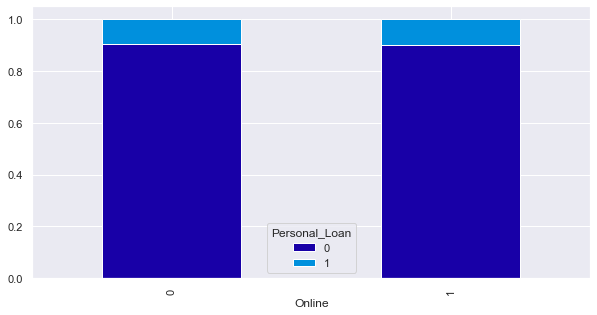

In [57]:
stacked_plot(loan['Online'])

Online Banking doesnt show any relation with Personal Loan buying.

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


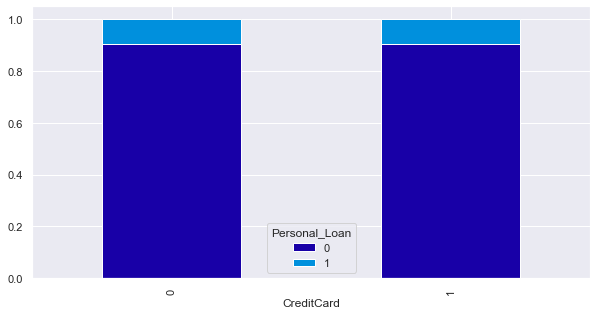

In [58]:
stacked_plot(loan['CreditCard'])

There are slightly more credit card holders taking the personal Loan from the bank comnpared to customers who do not have credit cards.

Personal_Loan     0    1   All
Age                           
23               12    0    12
24               28    0    28
25               53    0    53
26               65   13    78
27               79   12    91
28               94    9   103
29              108   15   123
30              119   17   136
31              118    7   125
32              108   12   120
33              105   15   120
34              116   18   134
35              135   16   151
36               91   16   107
37               98    8   106
38              103   12   115
39              127    6   133
40              117    8   125
41              128    8   136
42              112   14   126
43              134   15   149
44              107   14   121
45              114   13   127
46              114   13   127
47              103   10   113
48              106   12   118
49              105   10   115
50              125   13   138
51              119   10   129
52              130   15   145
53      

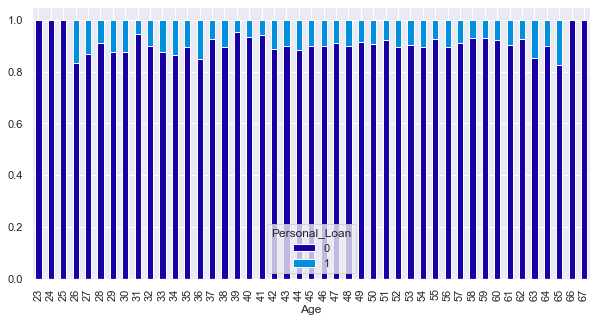

In [59]:
stacked_plot(loan['Age'])

It seems that age group 25-65 years are taking personal Loans.

In [60]:
loan.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

Personal_Loan     0    1   All
Experience                    
0                96    7   103
1                81    8    89
2                76    9    85
3               112   17   129
4               104    9   113
5               132   14   146
6               107   12   119
7               109   12   121
8               101   18   119
9               127   20   147
10              111    7   118
11              103   13   116
12               86   16   102
13              106   11   117
14              121    6   127
15              114    5   119
16              114   13   127
17              114   11   125
18              125   12   137
19              121   14   135
20              131   17   148
21              102   11   113
22              111   13   124
23              131   13   144
24              123    8   131
25              128   14   142
26              120   14   134
27              115   10   125
28              127   11   138
29              112   12   124
30      

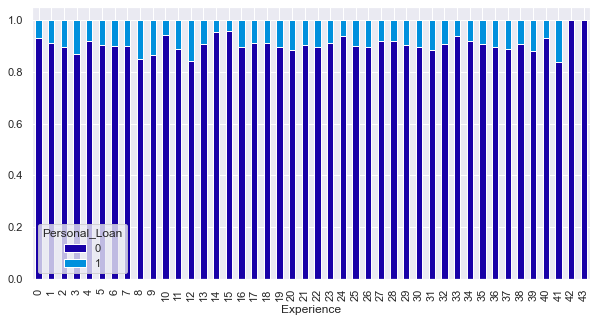

In [61]:
stacked_plot(loan['Experience'])

### Key Observations - 
* CD_Account and CreditCard,Education appear to be very strong indicators of taking Personal Loan.

* Other factors appear to be not very good indicators of of taking Personal Loan. (We can use chi-square tests to determine statistical significance in the association between two categorical variables).

### Let us check which of these differences are statistically significant.

The Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them.
  
**Null Hypothesis -** There is no association between the two variables.      
**Alternate Hypothesis -** There is an association between two variables.

In [62]:
crosstab = pd.crosstab(loan['CD_Account'],loan['Personal_Loan'])  # Contingency table of region and smoker attributes

Ho = "CD_Account has no effect on Personal_Loan"   # Stating the Null Hypothesis
Ha = "CD_Account has an effect on Personal_Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

CD_Account has an effect on Personal_Loan as the p_value (0.0) < 0.05


In [63]:
crosstab = pd.crosstab(loan['Personal_Loan'],loan['Family'])  # Contingency table of region and smoker attributes

Ho = "Family has no effect on Personal_Loan"   # Stating the Null Hypothesis
Ha = "Family has an effect on Personal_Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Family has an effect on Personal_Loan as the p_value (0.0) < 0.05


In [64]:
crosstab = pd.crosstab(loan['Personal_Loan'],loan['Education'])  # Contingency table of region and smoker attributes

Ho = "Education has no effect on Personal_Loan"   # Stating the Null Hypothesis
Ha = "Education has an effect on Personal_Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Education has an effect on Personal_Loan as the p_value (0.0) < 0.05


In [65]:
crosstab = pd.crosstab(loan['Personal_Loan'],loan['Securities_Account'])  # Contingency table of region and smoker attributes

Ho = "Securities_Account has no effect on Personal_Loan"   # Stating the Null Hypothesis
Ha = "Securities_Account has an effect on Personal_Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Securities_Account has no effect on Personal_Loan as the p_value (0.141) > 0.05


In [66]:
crosstab = pd.crosstab(loan['Personal_Loan'],loan['Online'])  # Contingency table of region and smoker attributes

Ho = "Online has no effect on Personal_Loan"   # Stating the Null Hypothesis
Ha = "Online has an effect on Personal_Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Online has no effect on Personal_Loan as the p_value (0.693) > 0.05


In [67]:
crosstab = pd.crosstab(loan['Personal_Loan'],loan['CreditCard'])  # Contingency table of region and smoker attributes

Ho = "CreditCard has no effect on Personal_Loan"   # Stating the Null Hypothesis
Ha = "CreditCard has an effect on Personal_Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

CreditCard has no effect on Personal_Loan as the p_value (0.884) > 0.05


### We observed that having a CD_Account means that there are high chances of taking Personal Loan, let us see  if any of the other variables indicate higher chances of CD_Account.

In [68]:
def stacked_plot_CD(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,loan['CD_Account'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,loan['CD_Account'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.show()

CD_Account     0    1   All
Education                  
1           1978  118  2096
2           1315   88  1403
3           1405   96  1501
All         4698  302  5000
------------------------------------------------------------------------------------------------------------------------


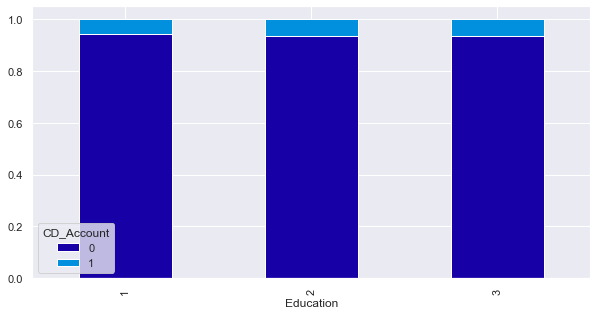

In [69]:
stacked_plot_CD(loan['Education'])

CD_Account             0    1   All
Securities_Account                 
0                   4323  155  4478
1                    375  147   522
All                 4698  302  5000
------------------------------------------------------------------------------------------------------------------------


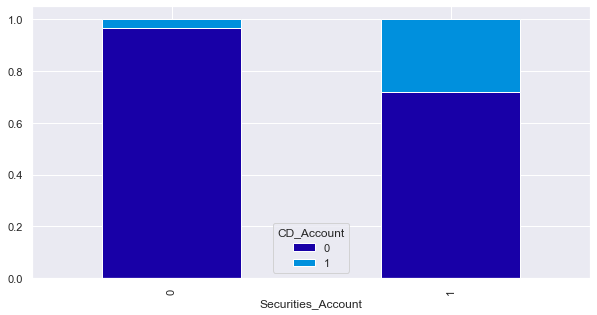

In [70]:
stacked_plot_CD(loan['Securities_Account'])

CD_Account     0    1   All
Online                     
0           1997   19  2016
1           2701  283  2984
All         4698  302  5000
------------------------------------------------------------------------------------------------------------------------


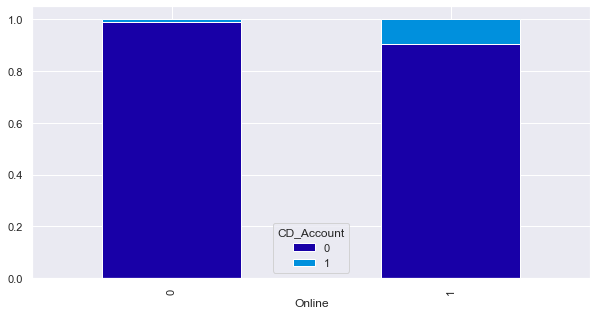

In [71]:
stacked_plot_CD(loan['Online'])

CD_Account     0    1   All
CreditCard                 
0           3468   62  3530
1           1230  240  1470
All         4698  302  5000
------------------------------------------------------------------------------------------------------------------------


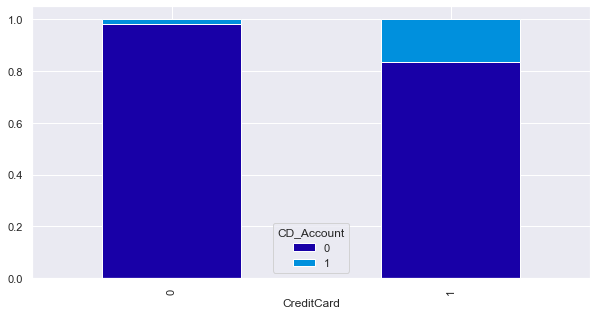

In [72]:
stacked_plot_CD(loan['CreditCard'])

CD_Account     0    1   All
Family                     
1           1389   83  1472
2           1229   67  1296
3            928   82  1010
4           1152   70  1222
All         4698  302  5000
------------------------------------------------------------------------------------------------------------------------


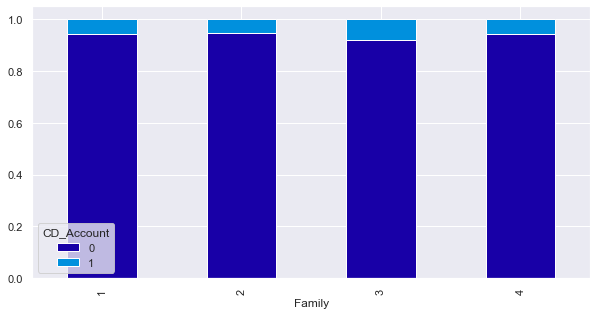

In [73]:
stacked_plot_CD(loan['Family'])

## Key Observations

1. Family and Education seem to have a slight impact on the CD_Account.
2. CreditCard,Online,Securities_Account seems to have a much bigger impact on CD_Account.

### Let us check which of these differences are statistically significant.

The Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them.
  
**Null Hypothesis -** There is no association between the two variables.      
**Alternate Hypothesis -** There is an association between two variables.

In [74]:
crosstab = pd.crosstab(loan['CD_Account'],loan['Securities_Account'])  # Contingency table of region and smoker attributes

Ho = "CD_Account has no effect on Securities_Account"   # Stating the Null Hypothesis
Ha = "CD_Account has an effect on Securities_Account"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

CD_Account has an effect on Securities_Account as the p_value (0.0) < 0.05


In [75]:
crosstab = pd.crosstab(loan['CD_Account'],loan['Online'])  # Contingency table of region and smoker attributes

Ho = "CD_Account has no effect on Online"   # Stating the Null Hypothesis
Ha = "CD_Account has an effect on Online"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

CD_Account has an effect on Online as the p_value (0.0) < 0.05


In [76]:
crosstab = pd.crosstab(loan['CD_Account'],loan['CreditCard'])  # Contingency table of region and smoker attributes

Ho = "CD_Account has no effect on CreditCard"   # Stating the Null Hypothesis
Ha = "CD_Account has an effect on CreditCard"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

CD_Account has an effect on CreditCard as the p_value (0.0) < 0.05


In [77]:
crosstab = pd.crosstab(loan['Family'],loan['CD_Account'])  # Contingency table of region and smoker attributes

Ho = "Family has no effect on CD_Account"   # Stating the Null Hypothesis
Ha = "Family has an effect on CD_Account"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Family has an effect on CD_Account as the p_value (0.018) < 0.05


## Key Observations-

* P-value for all tests < 0.02. Hence, all the differences that we see in the 3 plots are statistically significant.
* There is a correlation between CD_Account and Securities_Account. More chances for customers with Securities account to have CD account.
* There is a correlation between CD_Account and Online. More online customers have CD_Account.
* There is a correlation between CD_Account and CreditCard. More chances for Credit card customers of that bank to have CD Account
* There is a correlation between CD_Account and Family.Family Size 3 has more chances for CD Account.

## Lets look at outliers in every numerical column

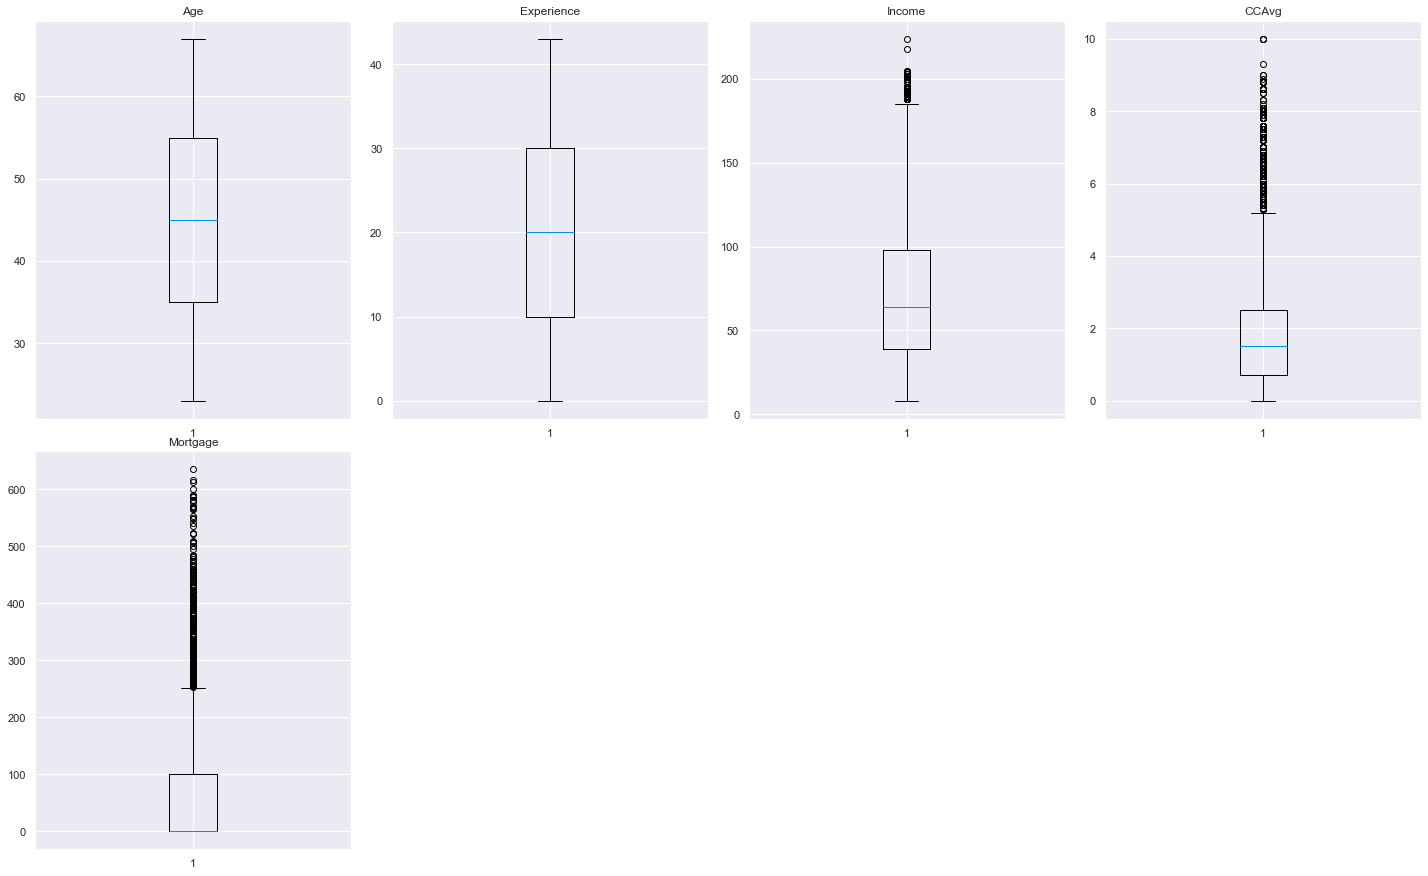

In [78]:
# outlier detection using boxplot
numerical_col = loan.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(loan[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* Income, CCAvg and Mortgage have upper outliers 


## Treating Outliers

In [79]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [80]:
numerical_col = loan.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

loan = treat_outliers_all(loan,numerical_col)

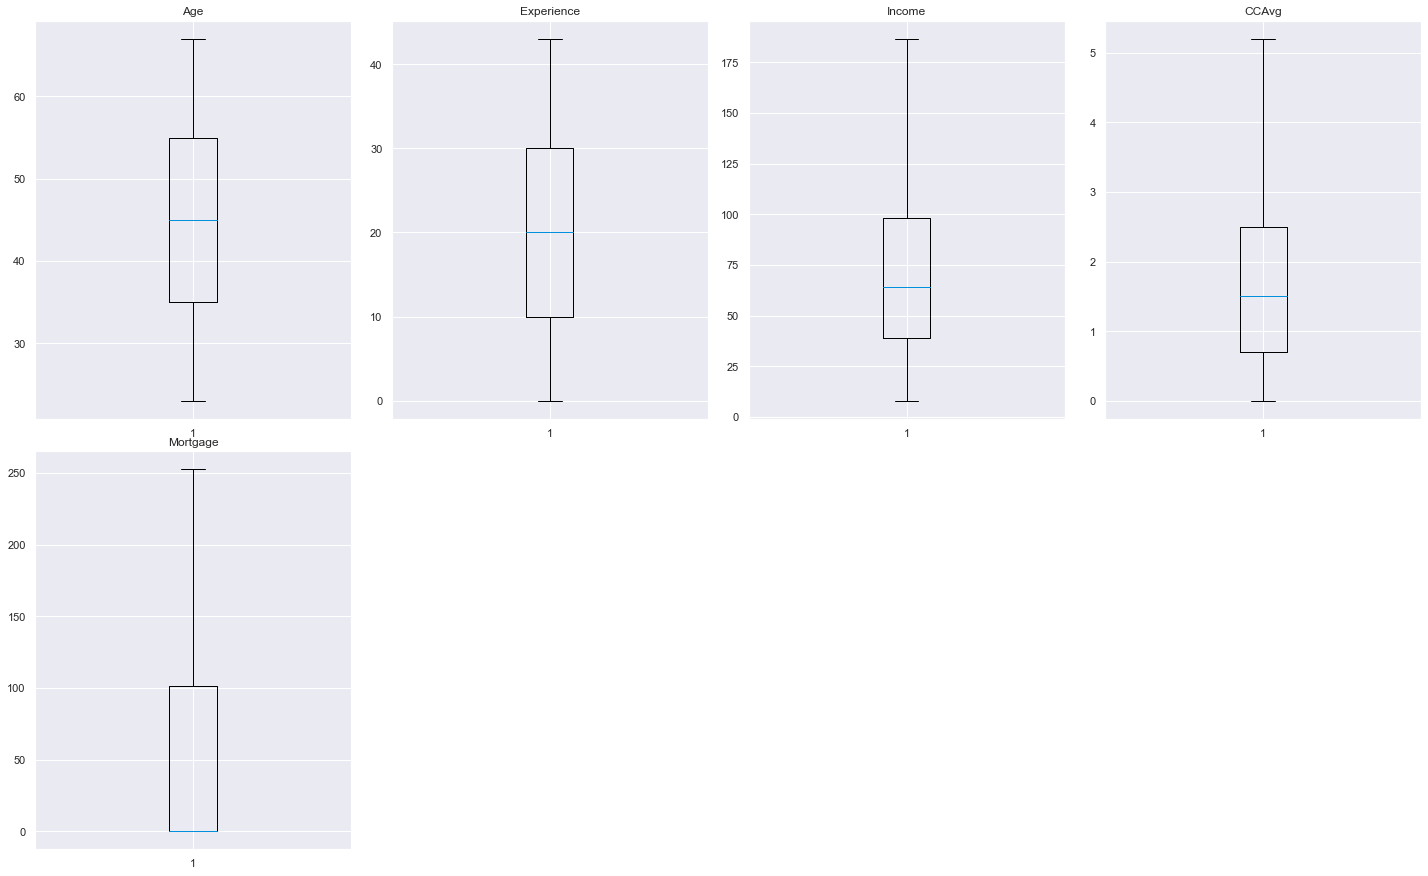

In [81]:
# outlier detection using boxplot
numerical_col = loan.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(loan[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

pip install uszipcode

In [82]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True) # set simple_zipcode=False to use rich info database
zipcode = search.by_zipcode(90028)
zipcode

SimpleZipcode(zipcode='90028', zipcode_type='Standard', major_city='Los Angeles', post_office_city='Los Angeles, CA', common_city_list=['Los Angeles', 'Hollywood'], county='Los Angeles County', state='CA', lat=34.1, lng=-118.33, timezone='Pacific', radius_in_miles=1.0, area_code_list=['818', '323'], population=28714, population_density=18838.0, land_area_in_sqmi=1.52, water_area_in_sqmi=0.0, housing_units=17126, occupied_housing_units=14964, median_home_value=593900, median_household_income=30953, bounds_west=-118.346769, bounds_east=-118.3092, bounds_north=34.107731, bounds_south=34.093487)

In [83]:
from uszipcode import SearchEngine
City=[]
State=[]
County=[]
population_density=[]
for i in loan['ZIPCode']:
    search = SearchEngine(simple_zipcode=True) # set simple_zipcode=False to use rich info database
    zipcode = search.by_zipcode(i)
   
    if zipcode:
        #if isinstance(zipcode.major_city, str):
        City.append(zipcode.major_city)
        State.append(zipcode.state) 
        County.append(zipcode.county) 
        population_density.append(zipcode.population_density)
      
        
    else:
        #print("The data needs further processing. All values are not similar ",loan['ZIPCode'] )
        City.append(np.nan)
        State.append(np.nan)
        County.append(np.nan)
        population_density.append(np.nan)
  

In [84]:
loan['City']=City
loan['State']=State
loan['County']=County
loan['population_density']=population_density

In [85]:
loan['County'].nunique()

38

In [86]:
loan['State'].unique()

array(['CA', nan], dtype=object)

In [87]:
loan['City'].nunique()

244

In [88]:
loan[loan['State']!="CA"]

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
106    43          17    69.0   92717      4   2.90         1       0.0   
172    38          13   171.0   92717      2   5.20         1       0.0   
184    52          26    63.0   92717      2   1.50         2       0.0   
321    44          20   101.0   92717      3   4.40         2      82.0   
366    50          24    35.0   92717      1   0.30         3       0.0   
384    51          25    21.0   93077      4   0.60         3       0.0   
468    34          10    21.0   92634      1   0.50         3       0.0   
476    60          34    53.0   92717      1   0.80         2       0.0   
630    32           7    35.0   96651      3   1.30         1     108.0   
672    51          27    23.0   96651      1   0.20         1       0.0   
695    29           4   115.0   92717      1   1.90         1       0.0   
721    49          24    39.0   92717      1   1.40         3       0.0   
780    32           7    42.0   92634      4   0.80         1       0.0   
1099   30           6    52.0   92717      3   0.70         2       0.0   
1189   42          17   115.0   92717      2   0.40         1       0.0   
1426   37          11    60.0   96651      3   0.50         3       0.0   
1483   58          32    63.0   92717      1   1.60         1       0.0   
1653   26           1    24.0   96651      2   0.90         3     123.0   
1752   33           8   155.0   92717      1   5.20         3       0.0   
1844   65          40    21.0   92717      3   0.10         3       0.0   
2049   43          18    94.0   92717      4   1.10         2       0.0   
2211   39          14    31.0   92717      2   1.40         2      94.0   
2218   38          13     9.0   92634      2   0.30         2       0.0   
2428   39          12   108.0   92717      4   3.67         2     252.5   
2486   61          36   130.0   92717      1   1.30         1     252.5   
2731   29           5    28.0   96651      1   0.20         3       0.0   
2957   61          36    53.0   92717      3   0.50         2       0.0   
3525   59          34    13.0   96651      4   0.90         2       0.0   
3887   24           1   118.0   92634      2   5.20         1       0.0   
4090   42          18    49.0   92717      3   2.10         3       0.0   
4276   50          24   155.0   92717      1   5.20         1       0.0   
4321   27           0    34.0   92717      1   2.00         2     112.0   
4384   45          20    61.0   92717      3   2.70         2       0.0   
4392   52          27    81.0   92634      4   3.80         2       0.0   

     Personal_Loan Securities_Account CD_Account Online CreditCard City State  \
106              0                  0          0      1          1  NaN   NaN   
172              0                  0          0      1          0  NaN   NaN   
184              0                  1          0      1          0  NaN   NaN   
321              1                  0          0      0          0  NaN   NaN   
366              0                  0          0      1          0  NaN   NaN   
384              0                  0          0      1          1  NaN   NaN   
468              0                  0          0      1          0  NaN   NaN   
476              0                  1          0      0          1  NaN   NaN   
630              0                  0          0      0          1  NaN   NaN   
672              0                  0          0      1          0  NaN   NaN   
695              0                  0          0      0          0  NaN   NaN   
721              0                  0          0      1          0  NaN   NaN   
780              0                  0          0      1          1  NaN   NaN   
1099             0                  0          0      1          0  NaN   NaN   
1189             0                  0          0      1          0  NaN   NaN   
1426             0                  0          0      1          0  NaN   NaN   
148

In [89]:
loan[loan['State']!="CA"]['ZIPCode'].unique()

#96651-San Francisco, California
#92634-Fullerton, CA
#93077-Simi Valley,CA
#92717-Irvine, CA

[92717, 93077, 92634, 96651]
Categories (4, int64): [92717, 93077, 92634, 96651]

In [90]:
#Correcting the City and State Names manually
loan['State']=loan['State'].replace(np.nan,"CA")

loan.loc[loan['ZIPCode'] ==96651, 'City'] = "San Francisco"
loan.loc[loan['ZIPCode'] ==96651, 'County'] = "San Francisco"

loan[loan['ZIPCode']==96651]

loan.loc[loan['ZIPCode'] ==92634, 'City'] = "Fullerton"
loan.loc[loan['ZIPCode'] ==92634, 'County'] = "Orange"

loan.loc[loan['ZIPCode'] ==92717, 'City'] = "Irvine"
loan.loc[loan['ZIPCode'] ==92717, 'County'] = "Orange"

In [91]:
loan.drop(loan.loc[loan['ZIPCode']==93077].index, inplace=True)
loan.drop(loan.loc[loan['ZIPCode']==96651].index, inplace=True)
loan.drop(loan.loc[loan['ZIPCode']==92717].index, inplace=True)
loan.drop(loan.loc[loan['ZIPCode']==92634].index, inplace=True)

In [92]:
loan['State'].unique()

array(['CA'], dtype=object)

In [93]:
bins = [0,10000,30000,60000]
ZIP_bin=['Low','Medium','High']
loan['ZIPCode_PopDenity'] = pd.cut(loan['population_density'],bins,right=False,labels=ZIP_bin)
loan.head()

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
0   25           1    49.0   91107      4    1.6         1       0.0   
1   45          19    34.0   90089      3    1.5         1       0.0   
2   39          15    11.0   94720      1    1.0         1       0.0   
3   35           9   100.0   94112      1    2.7         2       0.0   
4   35           8    45.0   91330      4    1.0         2       0.0   

  Personal_Loan Securities_Account CD_Account Online CreditCard  \
0             0                  1          0      0          0   
1             0                  1          0      0          0   
2             0                  0          0      0          0   
3             0                  0          0      0          0   
4             0                  0          0      0          1   

            City State                County  population_density  \
0       Pasadena    CA    Los Angeles County              4008.0   
1    Los Angeles    CA    Los Angeles County             11218.0   
2       Berkeley    CA        Alameda County              4761.0   
3  San Francisco    CA  San Francisco County             23606.0   
4     Northridge    CA    Los Angeles County              7931.0   

  ZIPCode_PopDenity  
0               Low  
1            Medium  
2               Low  
3            Medium  
4               Low

In [94]:
# The extracted variables City,State,County and population density wont be useful in target variable prediction.Lets drop them
loan=loan.drop(['City','State','County','population_density'], axis=1)

In [95]:
loan.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'ZIPCode_PopDenity'],
      dtype='object')

# Model Building

### Logistic Regression Using sklearn

In [96]:
## Defining X and Y variables
X = loan.drop(['Personal_Loan','ZIPCode'], axis=1)
Y = loan[['Personal_Loan']]

In [97]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y, test_size=0.30,stratify=Y,random_state=42)

In [98]:
X_train.shape

(3476, 16)

In [99]:
X_test.shape

(1490, 16)

In [100]:
y_train.value_counts(normalize=True)

Personal_Loan
0                0.903913
1                0.096087
dtype: float64

In [101]:
y_test.value_counts(normalize=True)

Personal_Loan
0                0.904027
1                0.095973
dtype: float64

In [102]:
# Importing the splitter, classification model, and the metric
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [103]:
#Create an oversampled training data
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state = 101)
X_train, y_train=smote.fit_resample(X_train,y_train)

In [104]:
y_train.shape

(6284, 1)

In [105]:
X_train.shape

(6284, 16)

In [106]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=42)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

#logreg.fit(X_train, y_train)
logreg.fit(X_train, np.ravel(y_train,order='C'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=42,
                   solver='newton-cg', verbose=True)

**Let's look at Model Performances**

**Prediction on train**

In [107]:
#Predictions for training set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix



def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_actual,y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['Takes Personal_Loan','Doesnt Take Personal_Loan']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



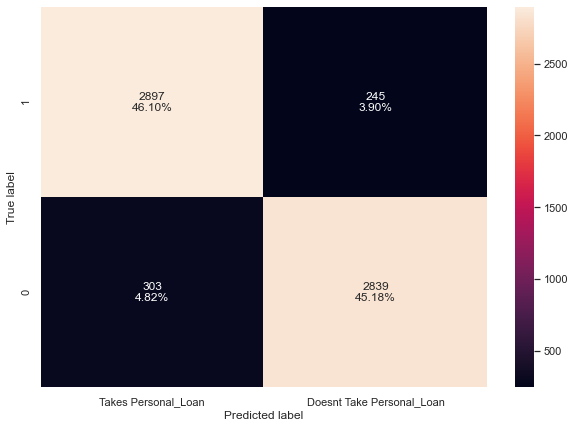

In [108]:
# Confusion matrix on train set
make_confusion_matrix(y_train,pred_train)

In [109]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3142
           1       0.91      0.92      0.91      3142

    accuracy                           0.91      6284
   macro avg       0.91      0.91      0.91      6284
weighted avg       0.91      0.91      0.91      6284



**Prediction on test set**

confusion matrix = 



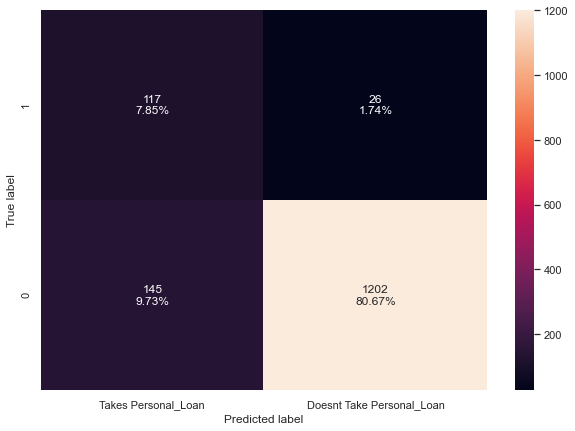

In [110]:
#Predict for test set
pred_test = logreg.predict(X_test)


print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test)

In [111]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1347
           1       0.45      0.82      0.58       143

    accuracy                           0.89      1490
   macro avg       0.71      0.86      0.76      1490
weighted avg       0.93      0.89      0.90      1490



In [112]:
#Accuracy with a threhold of 0.5
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))


Accuracy on train data: 0.9127943984723106
Accuracy on test data: 0.885234899328859


**AUC ROC curve**

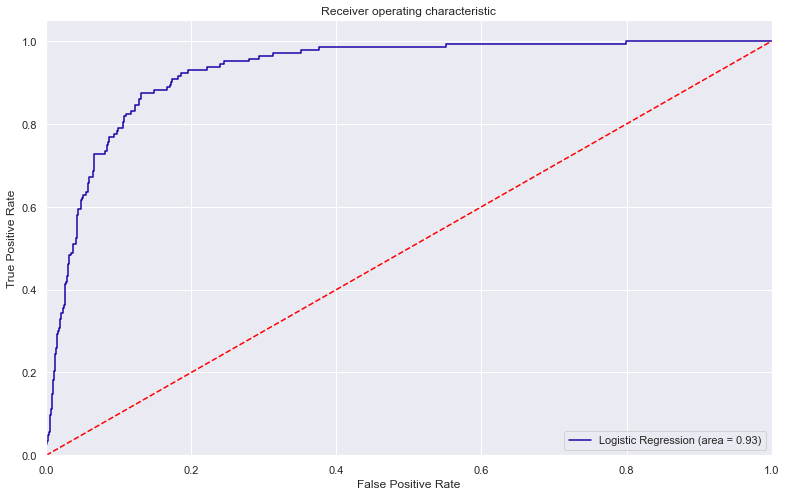

In [113]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [114]:
pd.DataFrame(logreg.predict_proba(X_test))

0         1
0     0.998588  0.001412
1     0.967261  0.032739
2     0.642487  0.357513
3     0.041513  0.958487
4     0.987422  0.012578
...        ...       ...
1485  0.999904  0.000096
1486  0.991645  0.008355
1487  0.991884  0.008116
1488  0.993441  0.006559
1489  0.999062  0.000938

[1490 rows x 2 columns]

**Optimal threshold**

In [115]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.4133246355391663


In [116]:
target_names = ['Doesnt Take Personal_Loan', 'Takes Personal_Loan']
y_pred_tr = (logreg.predict_proba(X_train)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test)[:,1]>optimal_threshold).astype(int)

In [117]:
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3142
           1       0.89      0.95      0.91      3142

    accuracy                           0.91      6284
   macro avg       0.91      0.91      0.91      6284
weighted avg       0.91      0.91      0.91      6284



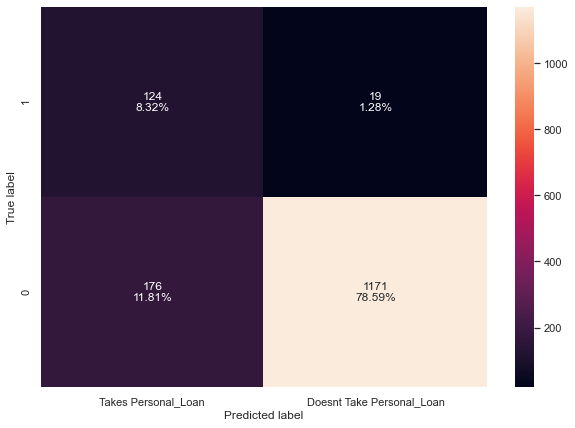

In [118]:
make_confusion_matrix(y_test,y_pred_ts)

In [119]:
print(classification_report(y_test, y_pred_ts))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1347
           1       0.41      0.87      0.56       143

    accuracy                           0.87      1490
   macro avg       0.70      0.87      0.74      1490
weighted avg       0.93      0.87      0.89      1490



In [120]:
#Accuracy with optimal threhold
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_ts))


Accuracy on train data: 0.911680458306811
Accuracy on test data: 0.8691275167785235


**Observation**
* After using optimal threshold we see that true positives have increased from 7.85% to 8.32%. and false negative has decreased from 1.74% to 1.28%

### Check for multicollinearity
# Let us ensure that Multicollinearity doesn't exist

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [121]:
# dataframe with numerical column only
num_feature_set = X.copy()
from statsmodels.tools.tools import add_constant
num_feature_set = add_constant(num_feature_set)

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                       454.205242
Age                          92.702580
Experience                   92.528445
Income                        1.818245
CCAvg                         1.697384
Mortgage                      1.023726
Family_2                      1.402025
Family_3                      1.386567
Family_4                      1.428189
Education_2                   1.292083
Education_3                   1.330622
Securities_Account_1          1.139613
CD_Account_1                  1.339952
Online_1                      1.040605
CreditCard_1                  1.111065
ZIPCode_PopDenity_Medium      1.002900
ZIPCode_PopDenity_High        1.003927
dtype: float64



**We observe that Age and Experience  exhibit high multicollinearity.So, lets drop them.**

In [123]:
num_feature_set = num_feature_set.drop('Age', axis=1)

In [124]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                       15.261254
Experience                   1.010560
Income                       1.813230
CCAvg                        1.692608
Mortgage                     1.023726
Family_2                     1.402021
Family_3                     1.379566
Family_4                     1.427933
Education_2                  1.277584
Education_3                  1.247299
Securities_Account_1         1.139374
CD_Account_1                 1.339128
Online_1                     1.040539
CreditCard_1                 1.111060
ZIPCode_PopDenity_Medium     1.002678
ZIPCode_PopDenity_High       1.003899
dtype: float64



## Build the logistic regression model 

**Split into training and test set**

In [125]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30)

In [126]:
#Create an oversampled training data
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state = 101)
X_train, y_train=smote.fit_resample(X_train,y_train)

**Building Logistic Regression model from statsmodels**

In [127]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.225037
         Iterations 8


**Let us look at summary**

In [128]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 6264
Model:                          Logit   Df Residuals:                     6248
Method:                           MLE   Df Model:                           15
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                  0.6753
Time:                        21:05:51   Log-Likelihood:                -1409.6
converged:                       True   LL-Null:                       -4341.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -5.6820      0.249    -22.821      0.000      -6.170      -5.194
Experience                   0.0023      0.004      0.528      0.597      -0.006       0.

In [129]:
X_train1 = X_train.drop('Experience', axis=1)
logit0 = sm.Logit(y_train, X_train1)
lg0 = logit0.fit()
print(lg0.summary())

Optimization terminated successfully.
         Current function value: 0.225059
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 6264
Model:                          Logit   Df Residuals:                     6249
Method:                           MLE   Df Model:                           14
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                  0.6753
Time:                        21:05:51   Log-Likelihood:                -1409.8
converged:                       True   LL-Null:                       -4341.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -5.6330      0.231    -24.433      0.000      -6.085

In [130]:
X_train2 = X_train1.drop('Mortgage', axis=1)
logit1 = sm.Logit(y_train, X_train2)
lg1 = logit1.fit()
print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.225484
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 6264
Model:                          Logit   Df Residuals:                     6250
Method:                           MLE   Df Model:                           13
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                  0.6747
Time:                        21:05:51   Log-Likelihood:                -1412.4
converged:                       True   LL-Null:                       -4341.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -5.5804      0.229    -24.388      0.000      -6.029

In [131]:
(np.exp(0.0465)-1)*100 

4.759807906853375

## interpretation of coefficients with respect to Income
* coefficient of  Income  is 0.0439
- Since the coefficient is positive therefore increase in Income results in increase in likelihood of customer taking personal Loan.
* 1 unit increase in Income increases the log odds of taking personal loan  by 0.0439
* This relates to changes in odds by 4.48% 

Please note that when coefficient is b , than change in odds is (exp(b)-1)*100 %
(np.exp(0.0439)-1)*100 = 4.48%
Probability = odd/(1+odd)

In [132]:
(np.exp(0.0465)/(1+np.exp(0.0465)))*100

51.16229057731355



So we can say for a one-unit increase in Income, we expect to see about 0.0439% increase in the odds of taking personal loan. In terms of probability there is 51.09% probability of taking personal loan

* Similarly we can interpret other variables
* Variable with positive coefficient indicates that increase in their value would increase the probability of taking personal Loan. As we can see variables like Age,CCAvg etc has positive coefficient.
* Variable with negative coefficient indicates that increase in their value would decrease the probability of taking Personal Loan. As we can see variables like Online_1,CreditCard_1,Securities_Account_1 etc has negative coefficient.


#### Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [133]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg0.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg0.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [134]:
# FIlter by significant p-value (pval <0.005) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.05
lgcoef[pval_filter]

coef  Odds_ratio  probability  pval
CD_Account_1              3.28       26.49         0.96  0.00
Education_3               0.58        1.79         0.64  0.00
Education_2               0.54        1.71         0.63  0.00
CCAvg                     0.45        1.57         0.61  0.00
Income                    0.05        1.05         0.51  0.00
Mortgage                  0.00        1.00         0.50  0.02
Family_4                 -0.34        0.71         0.42  0.02
Family_3                 -0.35        0.71         0.41  0.02
Online_1                 -1.28        0.28         0.22  0.00
ZIPCode_PopDenity_Medium -1.30        0.27         0.21  0.00
CreditCard_1             -1.95        0.14         0.12  0.00
ZIPCode_PopDenity_High   -2.05        0.13         0.11  0.03
Securities_Account_1     -2.48        0.08         0.08  0.00
Family_2                 -3.08        0.05         0.04  0.00
const                    -5.63        0.00         0.00  0.00

* As we can see above , for person with CD_Account_1 have the probability of taking personal Loan by 97%.
- Similarly we can interpret other variables

**Lets look at most significant variable**

In [135]:
# we are looking are overall significant varaible
pval_filter = lgcoef['pval']<=0.05
imp_vars = lgcoef[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '_' in col:
        first_part = col.split('_')[0]
        for c in loan.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print('Most significant varaibles category wise are :\n',lgcoef[pval_filter].index.tolist())
print('*'*120)

print(start+'Most overall significant varaibles  are '+end,':\n',sig_var)

Most significant varaibles category wise are :
 ['CD_Account_1', 'Education_3', 'Education_2', 'CCAvg', 'Income', 'Mortgage', 'Family_4', 'Family_3', 'Online_1', 'ZIPCode_PopDenity_Medium', 'CreditCard_1', 'ZIPCode_PopDenity_High', 'Securities_Account_1', 'Family_2', 'const']
************************************************************************************************************************
Most overall significant varaibles  are  :
 ['CD_Account', 'Education', 'Family', 'Online', 'ZIPCode', 'ZIPCode_PopDenity', 'CreditCard', 'Securities_Account']


### Prediction of the model
**Prediction on Train data**

In [136]:
pred_train = lg.predict(X_train)
pred_train = np.round(pred_train)

confusion matrix = 



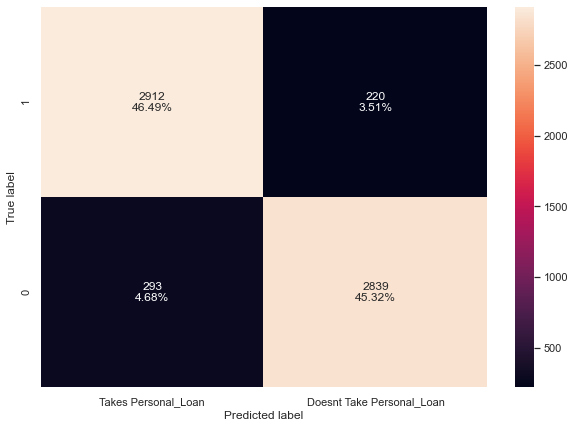

In [137]:
print("confusion matrix = \n")
make_confusion_matrix(y_train,pred_train )

In [138]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3132
           1       0.91      0.93      0.92      3132

    accuracy                           0.92      6264
   macro avg       0.92      0.92      0.92      6264
weighted avg       0.92      0.92      0.92      6264



**Prediction on Test data**

confusion matrix = 



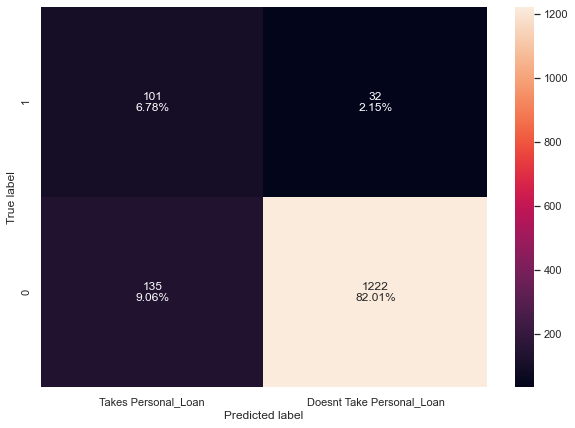

In [139]:
pred_ts = lg.predict(X_test)#predict(X_train)
pred_ts = np.round(pred_ts)
# mat_tst = confusion_matrix(y_test,np.round(pred_ts))

print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_ts )

In [140]:
print(classification_report(y_test,pred_ts))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1357
           1       0.43      0.76      0.55       133

    accuracy                           0.89      1490
   macro avg       0.70      0.83      0.74      1490
weighted avg       0.93      0.89      0.90      1490



In [141]:
#Accuracy with a threhold of 0.5
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_ts))


Accuracy on train data: 0.9181034482758621
Accuracy on test data: 0.8879194630872483


### AUC ROC Curve

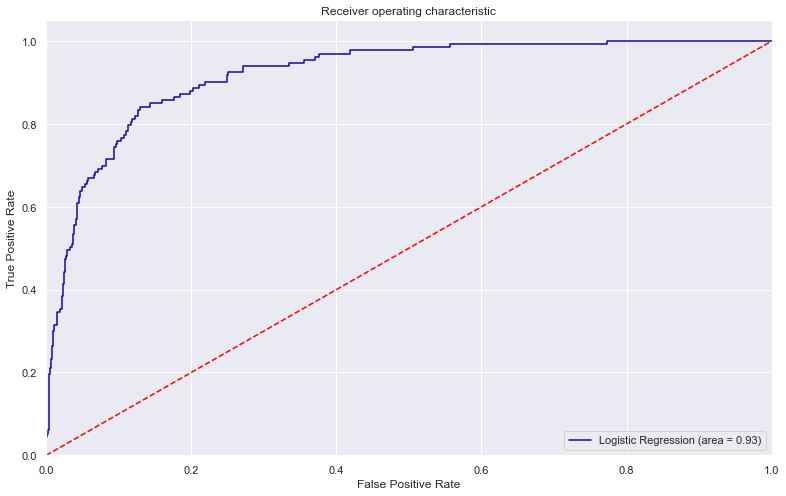

In [142]:

fpr, tpr, thresholds = roc_curve(y_test, lg.predict(X_test))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Choosing Optimal threshold

In [143]:
pred_train = lg.predict(X_train)
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, pred_train)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.44588088444629903


In [144]:
target_names = ['Doesnt Take Loan', 'Takes Loan']
y_pred_tr = (lg.predict(X_train)>optimal_threshold).astype(int)
y_pred_ts = (lg.predict(X_test)>optimal_threshold).astype(int)

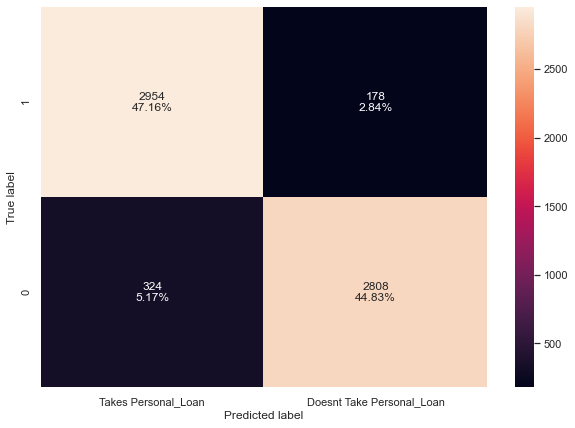

In [145]:
make_confusion_matrix(y_train,y_pred_tr )

In [146]:
print(classification_report(y_train,y_pred_tr))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3132
           1       0.90      0.94      0.92      3132

    accuracy                           0.92      6264
   macro avg       0.92      0.92      0.92      6264
weighted avg       0.92      0.92      0.92      6264



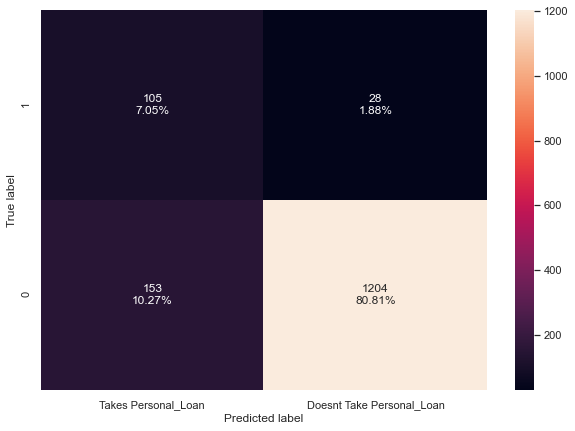

In [147]:
make_confusion_matrix(y_test,y_pred_ts)

In [148]:
print(classification_report(y_test,y_pred_ts))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1357
           1       0.41      0.79      0.54       133

    accuracy                           0.88      1490
   macro avg       0.69      0.84      0.73      1490
weighted avg       0.93      0.88      0.90      1490



In [149]:
#Accuracy with optimal threshold
print('Accuracy on train data:',accuracy_score(y_train,y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test,y_pred_ts))

Accuracy on train data: 0.9198595146871009
Accuracy on test data: 0.8785234899328859


**Observation**
* The accuracy on test data is 88% after removing multicollinearity and choosing optimal threshold. This is more reliable as multi collinearity has been removed from the data.
* AUC is 0.9

**Recommendations**
* This model can be used to automate the loan prediction of customers.



# Selecting subset of important features using Sequential Feature Selector method

*Why we should do feature selection*

- Reduces dimensionality
- Discards uninformative features
- Discards deceptive features (Deceptive features appear to aid learning on the training set, but impair generalisation)
- Speeds training/testing

### How sequential feature selector works?
### It starts with an empty model and adds in variables one by one.
* In each forward step, you add the one variable that gives the single best improvement to your model.


In [150]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [151]:
## Defining X and Y variables
X = loan.drop(['Personal_Loan','ZIPCode'], axis=1)
Y = loan[['Personal_Loan']]

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y, test_size=0.30,random_state=42)


In [152]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state = 101)
X_train, y_train=smote.fit_resample(X_train,y_train)

In [153]:
#from sklearn.linear_model import LogisticRegression

# Fit the model on train
m = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=42)

In [154]:
X_train.shape

(6282, 16)

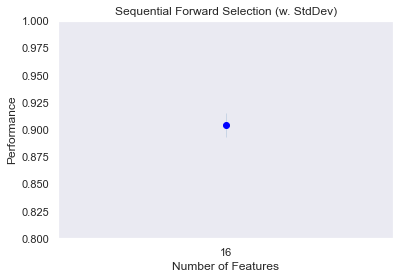

In [155]:

# we will first build model with all varaible
sfs = SFS(m, k_features=16, forward=False, floating=False, scoring='accuracy', verbose=2, cv=5)

sfs = sfs.fit(X_train, y_train.values.ravel())

fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.1s finished

[2021-03-19 21:05:55] Features: 1/16 -- score: 0.8729702202696746[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.3s finished

[2021-03-19 21:05:59] Features: 2/16 -- score: 0.884114563539719[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    3.3s finished

[2021-03-19 21:06:02] Features: 3/16 -- score: 0.8965305119357078[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

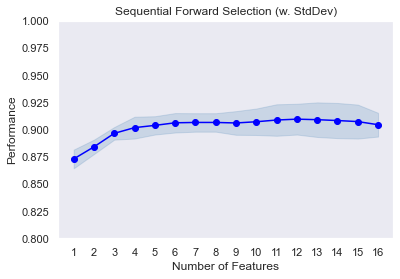

In [156]:
sfs1 = SFS(m, k_features=16, forward=True, floating=False, scoring='accuracy', verbose=2, cv=5)

sfs1 = sfs1.fit(X_train, y_train.values.ravel())

fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

### We can see that Accuracy stopped inceasing after addition of 16th feature, so we will proceed only with best 15 features

* Now we'll change k_features to 15, where k_features denotes "Number of features to select"

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.0s finished

[2021-03-19 21:06:38] Features: 1/15 -- score: 0.8729702202696746[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.4s finished

[2021-03-19 21:06:41] Features: 2/15 -- score: 0.884114563539719[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    3.5s finished

[2021-03-19 21:06:45] Features: 3/15 -- score: 0.8965305119357078[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

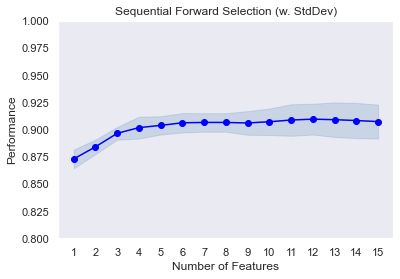

In [157]:
sfs1 = SFS(m, k_features=15, forward=True, floating=False, scoring='accuracy', verbose=2, cv=5)

sfs1 = sfs1.fit(X_train, y_train.values.ravel())

fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [158]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]


In [159]:
#Let's look at best 13 variables
X_train.columns[feat_cols]

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family_2',
       'Family_3', 'Family_4', 'Education_2', 'Securities_Account_1',
       'CD_Account_1', 'Online_1', 'CreditCard_1', 'ZIPCode_PopDenity_Medium',
       'ZIPCode_PopDenity_High'],
      dtype='object')

In [160]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same 18 variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [161]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1,random_state=42,class_weight={0:0.10,1:0.90})

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, np.ravel(y_train,order='C'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(class_weight={0: 0.1, 1: 0.9}, max_iter=10000, n_jobs=-1,
                   penalty='none', random_state=42, solver='newton-cg',
                   verbose=True)

### Let's Look at model performance

confusion matrix = 



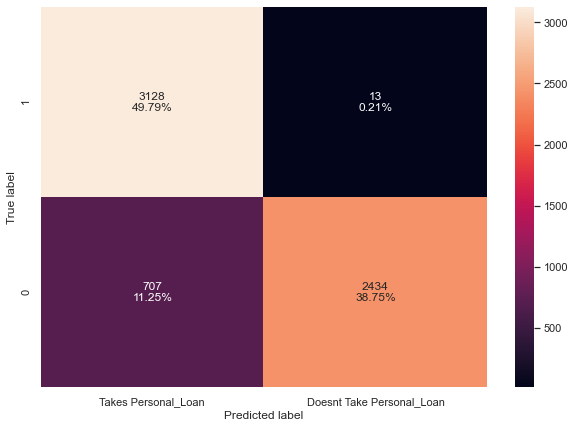

In [162]:
#Predict for train set
#Making confusion matrix on train data

pred_train = logreg.predict(X_train_final)

print("confusion matrix = \n")
make_confusion_matrix(y_train,pred_train)

In [163]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      3141
           1       0.82      1.00      0.90      3141

    accuracy                           0.89      6282
   macro avg       0.91      0.89      0.88      6282
weighted avg       0.91      0.89      0.88      6282



confusion matrix = 



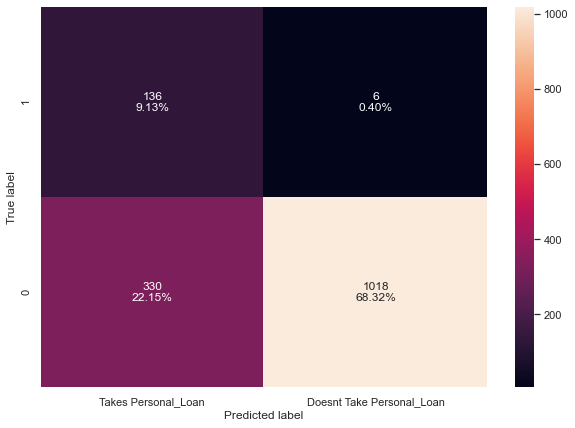

In [164]:
#Predict for test set
# Making confusion matrix on test data 
pred_test = logreg.predict(X_test_final)

print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test)

In [165]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      1348
           1       0.29      0.96      0.45       142

    accuracy                           0.77      1490
   macro avg       0.64      0.86      0.65      1490
weighted avg       0.93      0.77      0.82      1490



In [166]:
#Accuracy with a threhold of 0.5
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))


Accuracy on train data: 0.8853868194842407
Accuracy on test data: 0.774496644295302


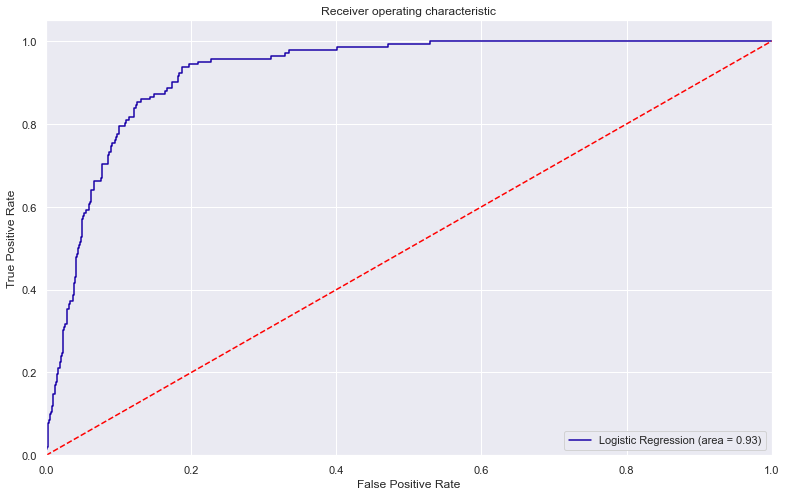

In [167]:
# AUC-ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_final)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [168]:
#Optimal threshold
pred_train =logreg.predict_proba(X_train_final)[:,1]
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, pred_train)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.7719310364470433


In [169]:
#  prediction with optimal threshold
y_pred_tr = (logreg.predict_proba(X_train_final)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test_final)[:,1]>optimal_threshold).astype(int)

In [170]:
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3141
           1       0.87      0.98      0.92      3141

    accuracy                           0.92      6282
   macro avg       0.92      0.92      0.92      6282
weighted avg       0.92      0.92      0.92      6282



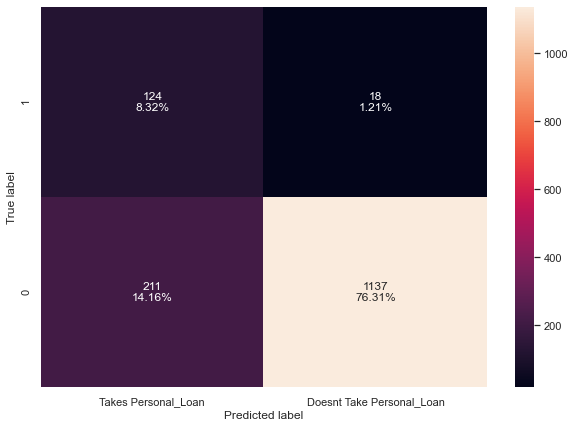

In [171]:
# let us make confusion matrix after optimal threshold has been choosen
make_confusion_matrix(y_test,y_pred_ts)

In [172]:
print(classification_report(y_test,y_pred_ts))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1348
           1       0.37      0.87      0.52       142

    accuracy                           0.85      1490
   macro avg       0.68      0.86      0.71      1490
weighted avg       0.93      0.85      0.87      1490



In [173]:
#Accuracy with optimal threhold
y_pred_tr = (logreg.predict_proba(X_train_final)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test_final)[:,1]>optimal_threshold).astype(int)

print('Accuracy on train data:',accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_ts))


Accuracy on train data: 0.9165870741801974
Accuracy on test data: 0.8463087248322148


## Decision Tree Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

In [174]:
## Defining X and Y variables
X = loan.drop(['Personal_Loan','ZIPCode'], axis=1)
Y = loan[['Personal_Loan']]

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'ZIPCode_PopDenity_Medium', 'ZIPCode_PopDenity_High']


In [175]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,stratify=Y,random_state=42)
print(X_train.shape, X_test.shape)

(3476, 16) (1490, 16)


In [176]:
print(y_train.value_counts())

Personal_Loan
0                3142
1                 334
dtype: int64


#Create an oversampled training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
#X_oversample, y_oversample = smote.fit_resample(X_train, y_train)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(X_train.shape, X_test.shape)

In [177]:
print(y_train.value_counts())

Personal_Loan
0                3142
1                 334
dtype: int64


## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.10,1:0.90} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [178]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.10,1:0.90},random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

In [179]:
# accuracy on training set
print("Accuracy on train set", model.score(X_train,y_train))

# accuracy on test set
print("Accuracy on test set", model.score(X_test,y_test))

Accuracy on train set 1.0
Accuracy on test set 0.9758389261744966


**What does a bank want?**
* A bank wants to identify the potential customers who have higher probability of purchasing the loan. 
  Here the bank can face 2 types of problems here: 
   * Bank cannot identify potential customers and lose business/opportunity.
   * A bank wrongly predicts customers,who doesnt want to take personal Loan, as potential customers and spends money on them for the campaign.Increase on campaign costs.

    
### Insights:

- **True Positives:**
    - Reality: A customer accepted the personal Loan offered by the bank.
    - Model predicted: The customer will accept the loan.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did NOT accept the personal Loan offered by the bank.
    - Model predicted: The customer will NOT accept the personal Loan offered by the bank.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT accept the personal Loan offered by the bank.
    - Model predicted: The customer will accept the personal Loan offered by the bank.
    - Outcome: The retail marketing department which is targeting the potential customers will be wasting their resources and campaign costs on the people/customers who will not be contributing to the revenue.

- **False Negatives:**
    - Reality: A customer accepted the personal Loan offered by the bank.
    - Model predicted: The customer will NOT accept the personal Loan offered by the bank.
    - Outcome: The potential customer is missed by the retail marketing department, the team could have designed some campaigns for potential customer or made some exclusive offers to make the customer come again to purchase. (Customer retention will get affected.)    
    
    
**Which loss is greater ?**    
 * In this case, not being able to identify a potential customer is the biggest loss we can face.So, we need to reduce False Negatives.
    Hence, recall is the right metric to check the performance of the model.  
    At the same time, we also need to reduce the cost of the campaign by reducing the False Positives.
    

* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives,
i.e. low chances of predicting potential customers as non potential customer.

In [180]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

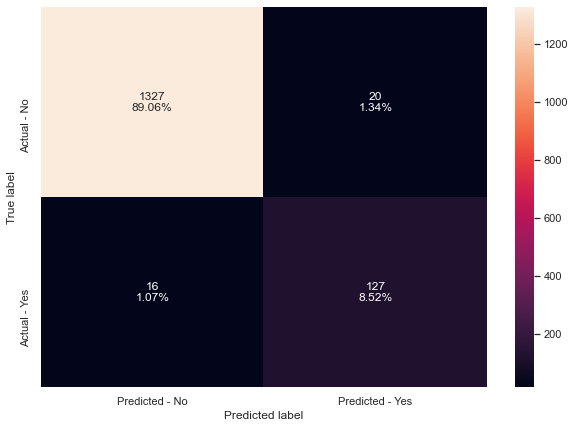

In [181]:
make_confusion_matrix(model,y_test)

In [182]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [183]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8881118881118881


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Visualizing the Decision Tree

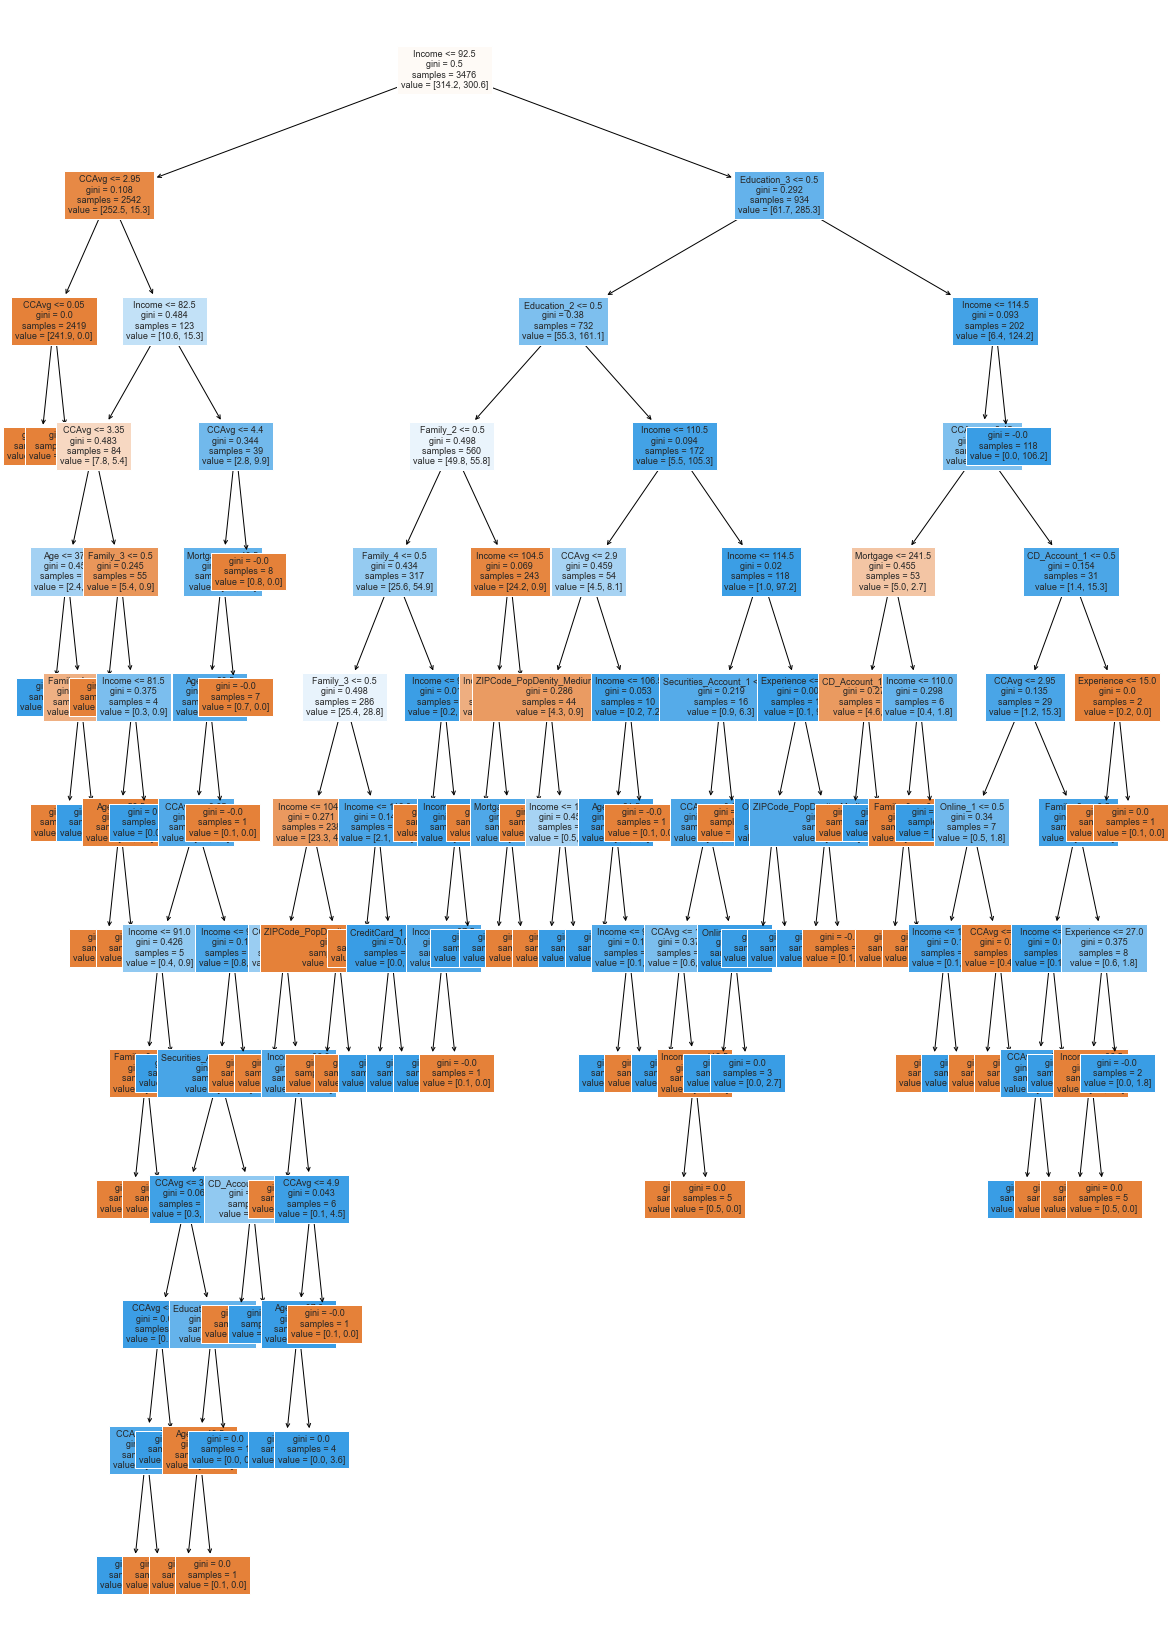

In [184]:
column_names = list(X.columns)
feature_names = column_names
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [185]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- CCAvg <= 0.05
|   |   |   |--- weights: [6.10, 0.00] class: 0
|   |   |--- CCAvg >  0.05
|   |   |   |--- weights: [235.80, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 82.50
|   |   |   |--- CCAvg <= 3.35
|   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |--- weights: [0.00, 3.60] class: 1
|   |   |   |   |--- Age >  37.50
|   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |--- weights: [2.40, 0.00] class: 0
|   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 0.90] class: 1
|   |   |   |--- CCAvg >  3.35
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- weights: [5.10, 0.00] class: 0
|   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |   |--- Age <= 58.50
|   |   |   |   |   |   |   |--- weights: [0.10, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  58.50
|   |   |   |   |   |   |   |--- weights:

In [186]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                          Imp
Income                   0.65
CCAvg                    0.10
Education_2              0.06
Family_3                 0.05
Family_2                 0.05
Family_4                 0.03
Education_3              0.02
Mortgage                 0.01
CD_Account_1             0.01
Age                      0.01
ZIPCode_PopDenity_Medium 0.00
Experience               0.00
Securities_Account_1     0.00
Online_1                 0.00
CreditCard_1             0.00
ZIPCode_PopDenity_High   0.00


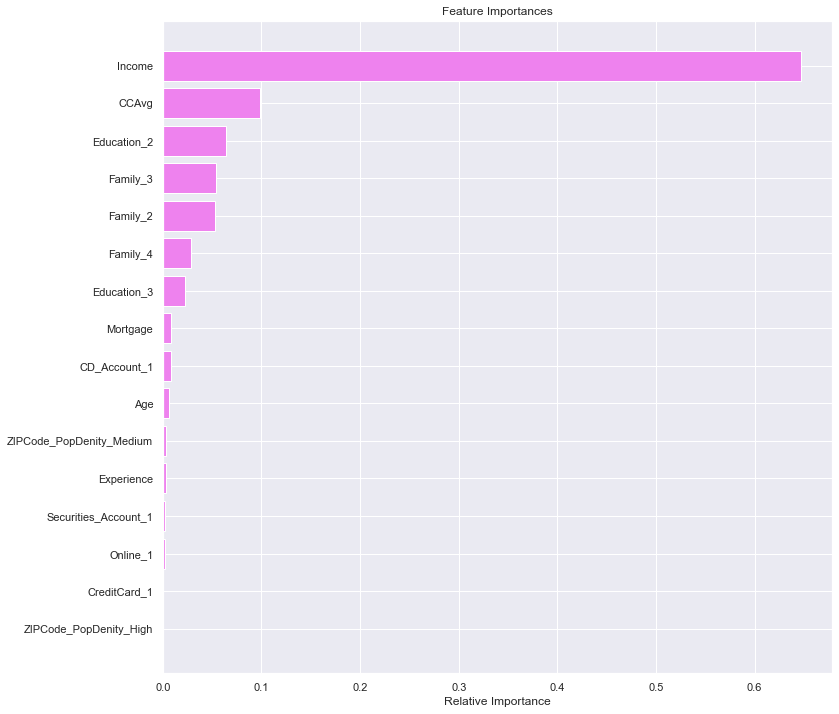

In [187]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**The tree above is very complex and difficult to interpret.**

## Reducing over fitting
### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.10,1:.90})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(10,15),
           'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            #'min_impurity_decrease': [0.000001,0.00001,0.0001],
           # 'max_features': ['log2','sqrt']
    'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
    'min_samples_split':[90,100],
    #'max_leaf_nodes' : [5, 10,15,20,25,30],
    #'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=10,
                       min_samples_split=100, random_state=1)

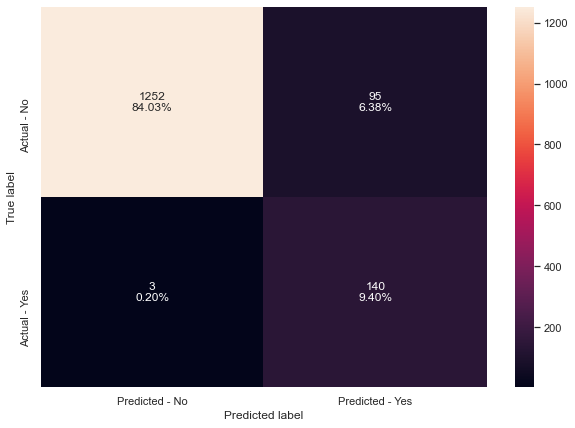

In [190]:
make_confusion_matrix(estimator,y_test)

In [191]:
get_recall_score(estimator)

Recall on training set :  0.9790419161676647
Recall on test set :  0.9790209790209791


**Recall has improved for both train and test set after hyperparameter tuning and we have a generalized model.**

## Visualizing the Decision Tree

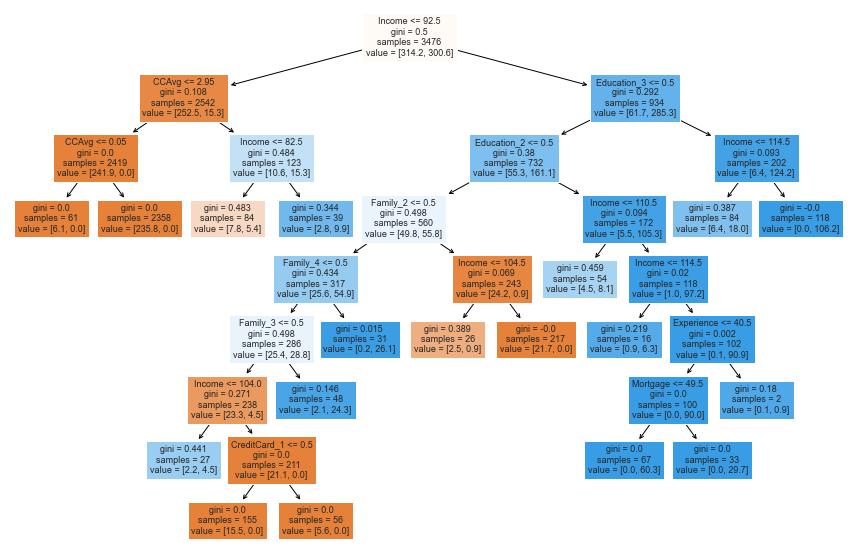

In [192]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [193]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- CCAvg <= 0.05
|   |   |   |--- weights: [6.10, 0.00] class: 0
|   |   |--- CCAvg >  0.05
|   |   |   |--- weights: [235.80, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 82.50
|   |   |   |--- weights: [7.80, 5.40] class: 0
|   |   |--- Income >  82.50
|   |   |   |--- weights: [2.80, 9.90] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_2 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |   |--- Income <= 104.00
|   |   |   |   |   |   |   |--- weights: [2.20, 4.50] class: 1
|   |   |   |   |   |   |--- Income >  104.00
|   |   |   |   |   |   |   |--- CreditCard_1 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [15.50, 0.00] class: 0
|   |   |   |   |   |   |   |--- CreditCard_1 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [5.60, 0.00] class: 0
|   |   |   |   |   |--- Fami

In [194]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                          Imp
Income                   0.70
Education_2              0.07
CCAvg                    0.06
Family_2                 0.06
Family_3                 0.06
Family_4                 0.03
Education_3              0.03
Experience               0.00
CreditCard_1             0.00
Mortgage                 0.00
Age                      0.00
Securities_Account_1     0.00
CD_Account_1             0.00
Online_1                 0.00
ZIPCode_PopDenity_Medium 0.00
ZIPCode_PopDenity_High   0.00


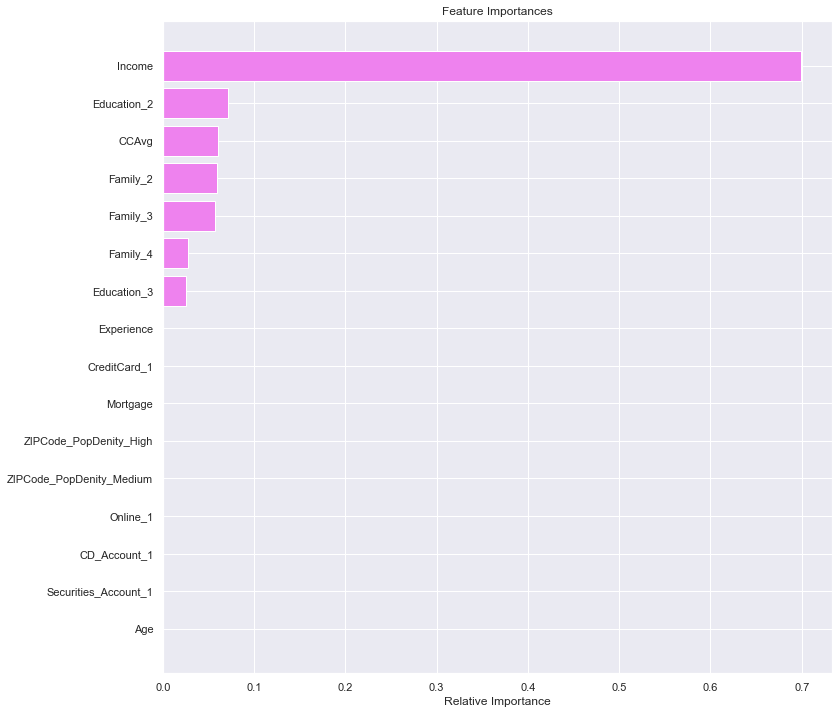

In [195]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [196]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.10,1:0.90})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [197]:
pd.DataFrame(path)

ccp_alphas  impurities
0         0.00       -0.00
1         0.00       -0.00
2         0.00       -0.00
3         0.00       -0.00
4         0.00       -0.00
5         0.00       -0.00
6         0.00       -0.00
7         0.00       -0.00
8         0.00       -0.00
9         0.00       -0.00
10        0.00       -0.00
11        0.00       -0.00
12        0.00       -0.00
13        0.00       -0.00
14        0.00        0.00
15        0.00        0.00
16        0.00        0.00
17        0.00        0.00
18        0.00        0.00
19        0.00        0.00
20        0.00        0.00
21        0.00        0.00
22        0.00        0.00
23        0.00        0.00
24        0.00        0.00
25        0.00        0.00
26        0.00        0.01
27        0.00        0.01
28        0.00        0.01
29        0.00        0.01
30        0.00        0.01
31        0.00        0.02
32        0.00        0.02
33        0.00        0.02
34        0.00        0.02
35        0.00        0.02
36        0.00        0.02
37        0.00        0.03
38        0.00        0.03
39        0.00        0.03
40        0.00        0.04
41        0.00        0.04
42        0.00        0.04
43        0.00        0.05
44        0.01        0.07
45        0.01        0.07
46        0.01        0.08
47        0.02        0.12
48        0.02        0.19
49        0.03        0.21
50        0.29        0.50

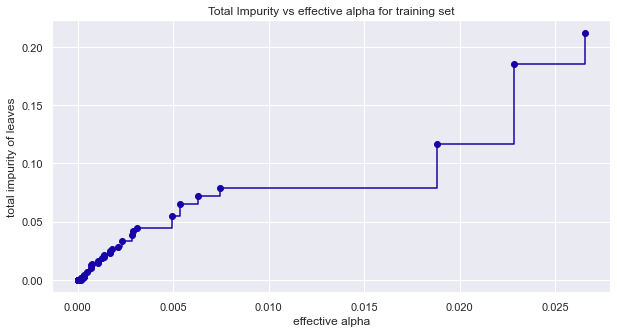

In [198]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [199]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha
                                 ,class_weight = {0:0.10,1:0.90})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.28780018081288833



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

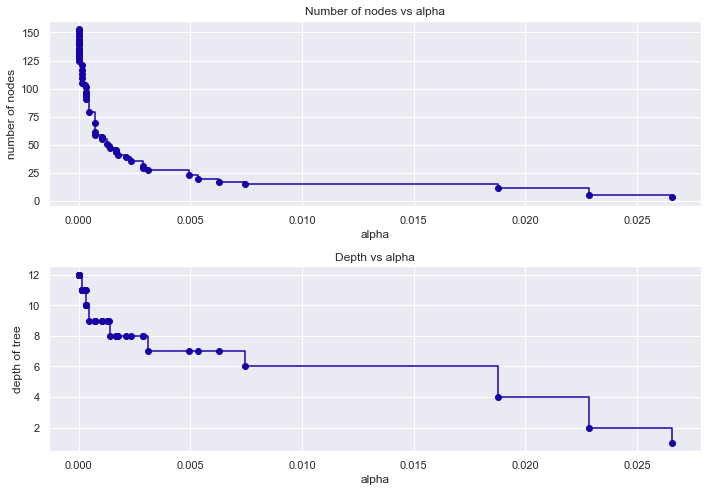

In [200]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [201]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [202]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [203]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

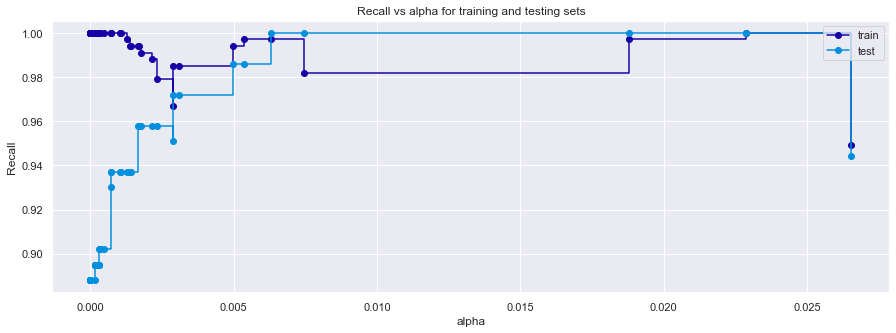

In [204]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.029 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.006 retaining information and getting higher recall.**

In [205]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006288075944874568,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


In [206]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006288075944874568,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

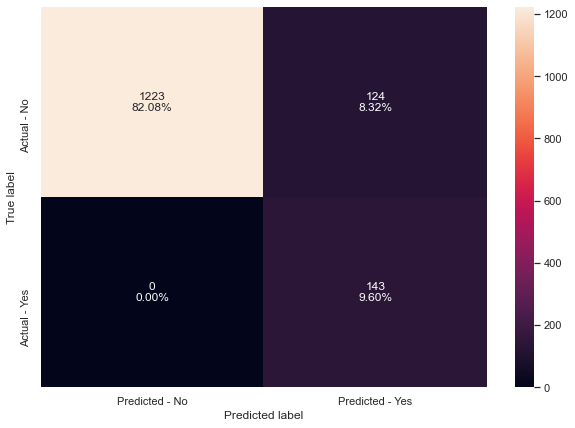

In [207]:
make_confusion_matrix(best_model,y_test)

In [208]:
get_recall_score(best_model)

Recall on training set :  0.9970059880239521
Recall on test set :  1.0


## Visualizing the Decision Tree

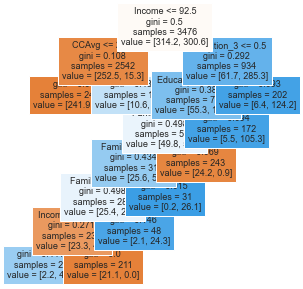

In [209]:
plt.figure(figsize=(5,5))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

**Creating model with 0.006 ccp_alpha**

In [210]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.006, random_state=1,
                       class_weight={0: 0.10, 1: 0.90})
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006, class_weight={0: 0.1, 1: 0.9},
                       random_state=1)

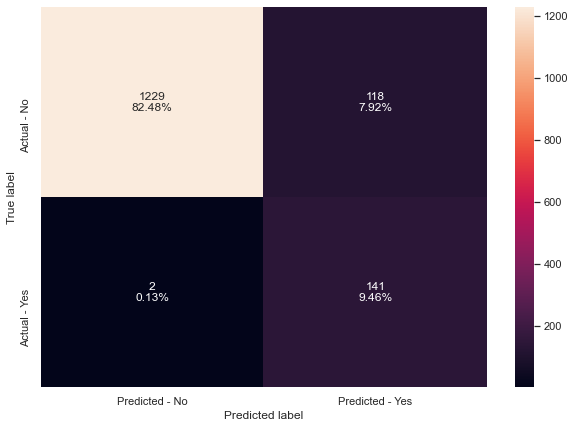

In [211]:
make_confusion_matrix(best_model2,y_test)

* We are able to identify more True positives - customers that are actually going to take personal Loan than any other model.

In [212]:
get_recall_score(best_model2)

Recall on training set :  0.9970059880239521
Recall on test set :  0.986013986013986


* The results have improved from the initial model and we have got higher recall than the hyperparameter tuned model and generalized decision tree - having comparable performance on training and test set.

## Visualizing the Decision Tree

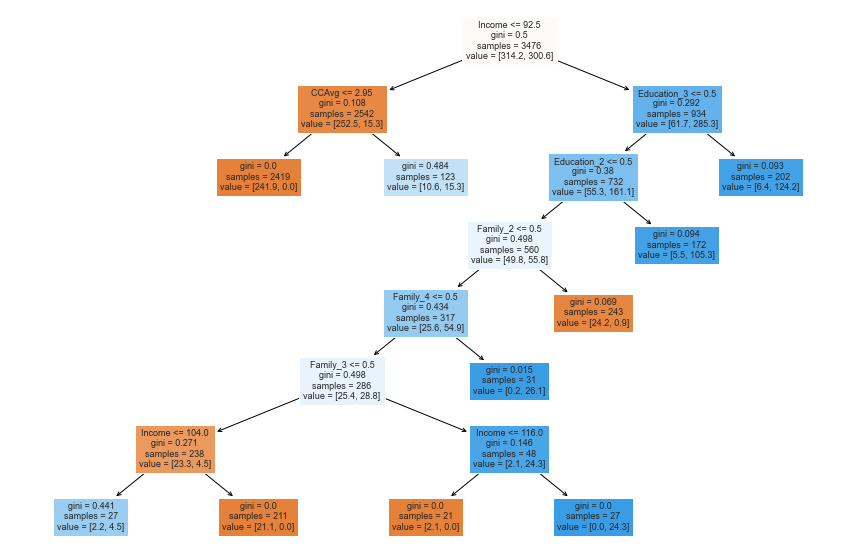

In [213]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [214]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2,feature_names=feature_names,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [241.90, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [10.60, 15.30] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_2 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |   |--- Income <= 104.00
|   |   |   |   |   |   |   |--- weights: [2.20, 4.50] class: 1
|   |   |   |   |   |   |--- Income >  104.00
|   |   |   |   |   |   |   |--- weights: [21.10, 0.00] class: 0
|   |   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |   |--- Income <= 116.00
|   |   |   |   |   |   |   |--- weights: [2.10, 0.00] class: 0
|   |   |   |   |   |   |--- Income >  116.00
|   |   |   |   |   |   |   |--- weights: [0.00, 24.30] class: 1
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.20, 26.10] class: 1
|   |   |   |--- Family_2 >  0.50
|   |   |   |   |--- weights: [

In [215]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                          Imp
Income                   0.69
Education_2              0.07
CCAvg                    0.06
Family_2                 0.06
Family_3                 0.06
Family_4                 0.03
Education_3              0.03
Age                      0.00
Experience               0.00
Mortgage                 0.00
Securities_Account_1     0.00
CD_Account_1             0.00
Online_1                 0.00
CreditCard_1             0.00
ZIPCode_PopDenity_Medium 0.00
ZIPCode_PopDenity_High   0.00


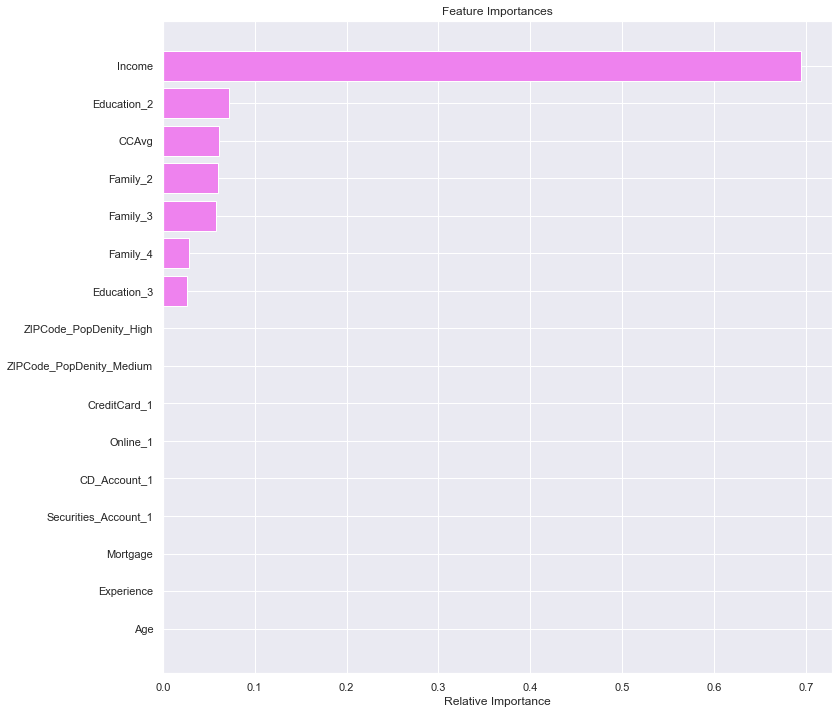

In [216]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Income and Education_2 are the top two important features to predict customers who take personal Loans.

## Comparing all the logistic Regression and decision tree models

In [217]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning','Initial Logistic Regression Model','After removing multicollinearity','equential Feature Selection'], 'Train_Recall':[1,0.97,0.99,0.95,0.94,0.98], 'Test_Recall':[0.88,0.97,0.98,0.87,0.80,0.87]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                Initial decision tree model          1.00         0.88
1  Decision treee with hyperparameter tuning          0.97         0.97
2            Decision tree with post-pruning          0.99         0.98
3          Initial Logistic Regression Model          0.95         0.87
4           After removing multicollinearity          0.94         0.80
5                equential Feature Selection          0.98         0.87

**Decision tree model with post pruning has given the best recall score on data.**

### Conclusions
- We analyzed the "Personal Loan campaign Modelling" using different techniques and used Logistic Regression and Decision Tree Classifier to build a predictive model for the same.
- The Decision tree model built can be used to predict if a customer is going to contribute to Revenue generation (by purchasing a Loan) or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with imbalanced classes which shows the robustness of Decision Trees.
- Income, Education_2, CCAvg and Family Size are the most important variable in predicting the potential customers that will buy the personal loan from the bank.
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

## Recommendations-
- The customers with a CD account have a higher probability (0.98) of taking the personal loan. The bank should do a market analysis and offer aggressive (above average) rates to attract customers. They should also leverage social advertising to target prospects and existing customers.
- The customers who are graduates and professionals have a probability of 0.65 to take a personal Loan. So, the bank should target these customers using multiple marketing channels (direct mail, video, website content, email, print, and digital ads) to reach the desired audience. 
- The customers whose income is high are more likely to spend on credit cards. Those with high  CreditCardAvg are more likely to take the personal Loan. The bank should provide positive customer service experience by making loan consolidation easier to attract these customers. 
- Creditcard, securities_account and Online variables have high correlation with CD account. Though correlation doesn’t mean causation, AllLife bank should design campaigns with attractive rates and increase online/mobile presence through local search optimization to attract the customers who fit this profile to sell more personal loans.
- Typical profile of a customer who is highly likely to buy personal loan from the bank – High income graduates and professionals with CD accounts.